## Frequency

1. Import dati puliti senza stopwords
2. Frequenze relative delle parole
3. Cosine similarity del vettore delle frequenze

In [1]:
#import pymongo 
#import pymongo 
import pandas as pd
import logging
#import bson
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')
import time
import pprint
import pickle
import random
import numpy as np
from sklearn.metrics import accuracy_score,precision_recall_curve, average_precision_score, confusion_matrix
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from pprint import pprint 
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
import json
import pandas as pd
import numpy as np
from collections import Counter, defaultdict
import spacy
from tqdm import tqdm_notebook
import nltk
from unidecode import unidecode
from functools import reduce
import operator
from collections import OrderedDict

In [3]:
from nltk import FreqDist

In [4]:
nlp = spacy.load("it_core_news_sm")

In [5]:
cognomi_XVIII = pickle.load( open( "Discorsi-XVIII-legis/cognomi_discorsi.p", "rb" ) )

In [6]:
cognomi_I = pickle.load( open( "Discorsi-I-legis/cognomi_discorsi.p", "rb" ) )

In [7]:
discorsi_puliti = {}

for cog in cognomi_XVIII:
    discorsi_puliti[cog] = pickle.load( open( 'Discorsi_puliti_XVIII/'+cog+".p", "rb" ) )

In [8]:
discorsi_puliti_I = {}

for cog in cognomi_I:
    discorsi_puliti_I[cog] = pickle.load( open( 'Discorsi_puliti_I/'+cog+".p", "rb" ) )

In [9]:
leng= []
legis_reduct_II =[]
for k in sorted(discorsi_puliti):
    if len(discorsi_puliti[k])>300 and len(discorsi_puliti[k])<2000:
        pprint(k+" "+str(len(discorsi_puliti[k])))
        legis_reduct_II.append(k)

'EMANUELE FIANO 499'
'ENRICO BORGHI 445'
'FEDERICO FORNARO 420'
'FRANCESCO PAOLO SISTO 301'
'RENATA POLVERINI 345'
'SIMONE BALDELLI 352'


In [10]:
leng= []
legis_reduct_I =[]
for k in sorted(discorsi_puliti_I):
    if len(discorsi_puliti_I[k])>300 and len(discorsi_puliti_I[k])<2000:
        pprint(k+" "+str(len(discorsi_puliti_I[k])))
        legis_reduct_I.append(k)

'ALMIRANTE 680'
'BASSO 413'
'COVELLI 384'
'DE GASPERI 563'
'DI VITTORIO 1456'
'FANFANI 814'
'GIOLITTI 883'
'LA MALFA 418'
'MORO 1648'
'PACCIARDI 415'
'RUSSO PEREZ 582'
'SEGNI 1331'
'TOGLIATTI 350'


In [11]:
corpora = {}
for cog in legis_reduct_II:
    corpora[cog] = [reduce(operator.concat, discorsi_puliti[cog])]

In [68]:
corpora_I = {}
for cog in legis_reduct_I:
    corpora_I[cog] = [reduce(operator.concat, discorsi_puliti_I[cog])]

In [113]:
freqDist = {}
words = {}
for cog in legis_reduct_II:
    freqDist[cog] = FreqDist(corpora[cog][0])
    words[cog] = list(freqDist[cog].keys())

In [114]:
freqDist_I = {}
words_I = {}
for cog in legis_reduct_I:
    freqDist_I[cog] = FreqDist(corpora_I[cog][0])
    words_I[cog] = list(freqDist_I[cog].keys())

In [115]:
for cog in legis_reduct_II:
    for w in words[cog]:
        freqDist[cog][w] = freqDist[cog][w] / len(corpora[cog][0])

In [116]:
for cog in legis_reduct_I:
    for w in words_I[cog]:
        freqDist_I[cog][w] = freqDist_I[cog][w] / len(corpora_I[cog][0])

In [48]:
def similarity(cog, c, words_pair):
    pol1 = {}
    pol2 = {}
      
    for w in words_pair:
        if w not in freqDist[cog]:
            pol1[w] = 0
        else:
            pol1[w] = freqDist[cog][w]
            
        if w not in freqDist[c]:
            pol2[w] = 0   
        else: 
            pol2[w] = freqDist[c][w]
            
    final_val = {}
    final_val[cog] = OrderedDict(sorted(pol1.items(), key=lambda t: t[0]))
    final_val[c] = OrderedDict(sorted(pol2.items(), key=lambda t: t[0]))
    
    only_val = {}
    only_val[cog] = []
    only_val[c] = []
    
    for k in final_val[cog].keys():
        only_val[cog].append(final_val[cog][k])
        
    for k in final_val[c].keys():
        only_val[c].append(final_val[c][k])
        
    return cosine_similarity([only_val[c]],[only_val[cog]])

    

In [99]:
len(words[c])

4175

In [100]:
data

{'EMANUELE FIANO': [array([[1.]])]}

In [117]:
data = {}

for cog in legis_reduct_II:
    data[cog] = []
    for c in legis_reduct_II:
        words_pair = set()
        words_pair = set(words[cog]).union(set(words[c]))
        
        words_final = []
        for w in words_pair:
            if freqDist[c][w] > 0.02 and freqDist[cog][w] > 0.02:
                print(w)
            else: 
                words_final.append(w)
                
        val = similarity(cog,c,words_final)
        data[cog].append((c,val))
                
        
                

essere
’
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e
essere
presidente
’
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e
favorevole
’
minoranza
essere
xi
commissione
relatrice
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e


In [118]:
data

{'EMANUELE FIANO': [('EMANUELE FIANO', array([[1.]])),
  ('ENRICO BORGHI', array([[0.90735938]])),
  ('FEDERICO FORNARO', array([[0.7801714]])),
  ('FRANCESCO PAOLO SISTO', array([[0.85177582]])),
  ('RENATA POLVERINI', array([[0.35639662]])),
  ('SIMONE BALDELLI', array([[0.87362781]]))],
 'ENRICO BORGHI': [('EMANUELE FIANO', array([[0.90735938]])),
  ('ENRICO BORGHI', array([[1.]])),
  ('FEDERICO FORNARO', array([[0.76741198]])),
  ('FRANCESCO PAOLO SISTO', array([[0.80449062]])),
  ('RENATA POLVERINI', array([[0.31441377]])),
  ('SIMONE BALDELLI', array([[0.8243562]]))],
 'FEDERICO FORNARO': [('EMANUELE FIANO', array([[0.7801714]])),
  ('ENRICO BORGHI', array([[0.76741198]])),
  ('FEDERICO FORNARO', array([[1.]])),
  ('FRANCESCO PAOLO SISTO', array([[0.7991299]])),
  ('RENATA POLVERINI', array([[0.32723963]])),
  ('SIMONE BALDELLI', array([[0.85340264]]))],
 'FRANCESCO PAOLO SISTO': [('EMANUELE FIANO', array([[0.85177582]])),
  ('ENRICO BORGHI', array([[0.80449062]])),
  ('FEDERICO 

In [119]:
matrixdata = []
for cog in legis_reduct_II:
    m = []
    for l in data[cog]:
        m.append((round(float(l[1][0]),5)))
    matrixdata.append(m)

In [120]:
data = np.array(matrixdata)
    
data = data.transpose()
data = np.array(data)
shape = ( len(legis_reduct_II), len(legis_reduct_II) )
data = data.reshape( shape )
data = np.array(data)


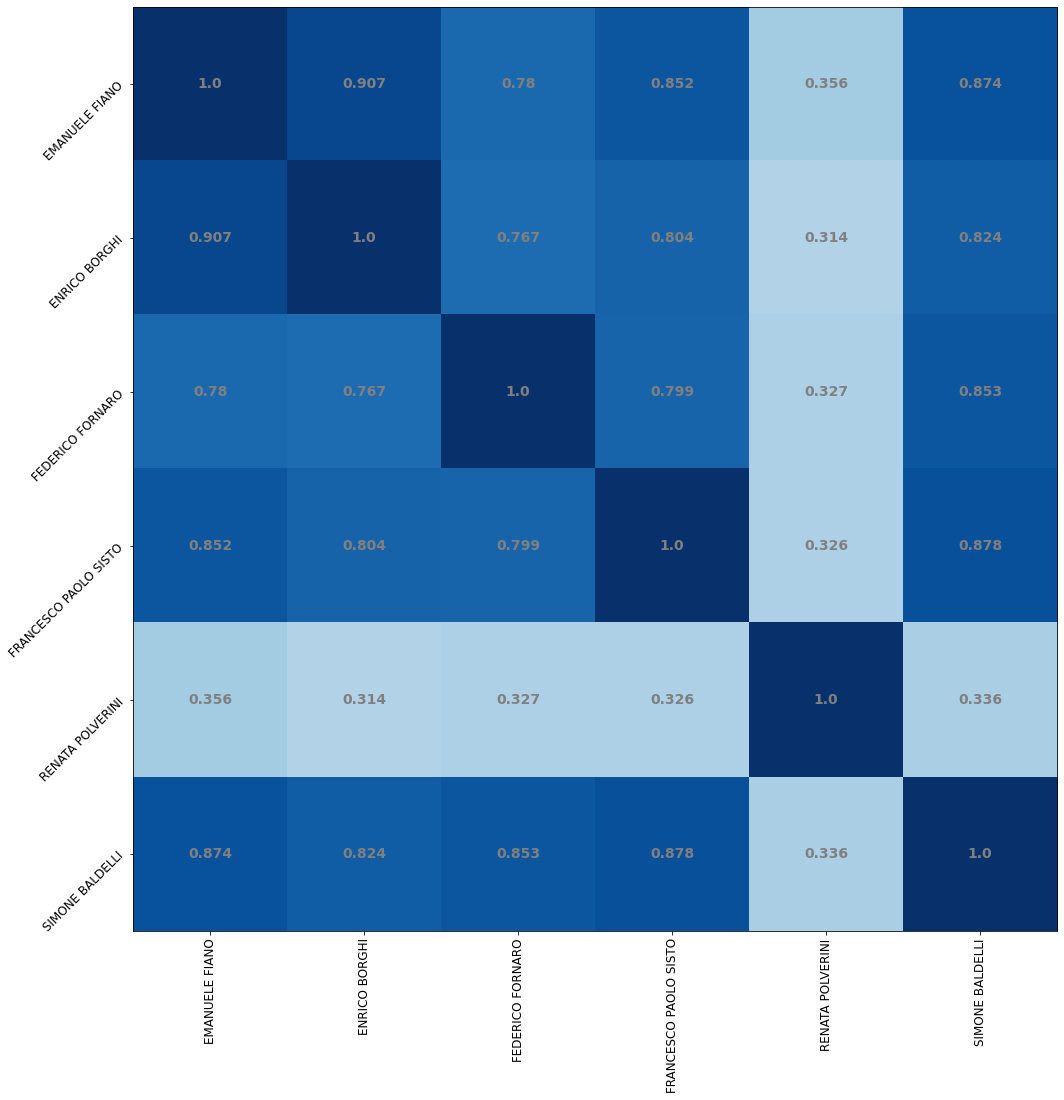

In [123]:
    #fig,ax= plt.subplots(2,2, figsize=(16,10))
    fig,ax= plt.subplots()
    
    ax.matshow(data, cmap=plt.cm.Blues, vmin=0, vmax=1,)
    #m = ax.imshow(harvest)
    
    for i in range(len(legis_reduct_II)):
        for j in range(len(legis_reduct_II)):
            c = data[j,i]
            ax.text(i, j, round(c,3), va='center', ha='center', color ='grey', weight='bold', size=14)
    #ax.colorbar()
    #ax.set_title("Test error per la label: ", size = 20)
    #ax.xlabels("Lambda")
    
    ax.set_xticks(np.arange(len((legis_reduct_II))))
    ax.set_yticks(np.arange(len(legis_reduct_II)))

    ax.set_yticklabels(legis_reduct_II, size = 12, rotation = 45)
    ax.set_xticklabels(legis_reduct_II, size = 12,rotation = 90 )
    #plt.xlabel("Lambda", size=17, labelpad = 25)
    #plt.ylabel("Iterazioni", size = 17, labelpad = 25)
    
    #plt.colorbar(data=data)
    fig.set_size_inches(17, 17)
    ax.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)
    plt.show()
    #fig.savefig('img/testerrormatrix'+str(title[index])+'.png', dpi=100)
    #fig.savefig('matrixacc'+title[index]+'.png', dpi=100) #sistemare bene e poi salvare

### All legis
Rifaccio la stessa cosa di prima ma non più per ogni legislatura ma unendo tutti i politici di tutte le legislature.
1. Import dei discorsi (senza stopwords)
2. Seleziono solo politici con un determinato numero di discorsi
3. Calcolo frequenza relativa dei termini
4. Confronto le frequenze di un politico con ogni altro unendo ogni volta i due dizionari di words e in caso mettendeo a 0 le frequenze delle parole non presenti
5. Faccio cosine similarity tra le due distribuzioni


In [7]:
all_legis = {}

for cog in cognomi_I:
    all_legis[cog] = pickle.load( open( 'Discorsi_puliti_I/'+cog+".p", "rb" ) )
    
for cog in cognomi_XVIII:
    all_legis[cog] = pickle.load( open( 'Discorsi_puliti_XVIII/'+cog+".p", "rb" ) )

In [8]:
leng= []
legis =[]
for k in all_legis.keys():
    if len(all_legis[k])>300 and len(all_legis[k])<2000:
        pprint(k+" "+str(len(all_legis[k])))
        legis.append(k)

'MORO 1648'
'DE GASPERI 563'
'FANFANI 814'
'SEGNI 1331'
'TOGLIATTI 350'
'DI VITTORIO 1456'
'GIOLITTI 883'
'BASSO 413'
'LA MALFA 418'
'PACCIARDI 415'
'ALMIRANTE 680'
'RUSSO PEREZ 582'
'COVELLI 384'
'FEDERICO FORNARO 420'
'FRANCESCO PAOLO SISTO 301'
'RENATA POLVERINI 345'
'SIMONE BALDELLI 352'
'ENRICO BORGHI 445'
'EMANUELE FIANO 499'


In [44]:
corpora = {}
for cog in legis:
    corpora[cog] = [reduce(operator.concat, all_legis[cog])]

In [45]:
freqDist = {}
words = {}
for cog in legis:
    freqDist[cog] = FreqDist(corpora[cog][0])
    words[cog] = list(freqDist[cog].keys())

In [46]:
for cog in legis:
    for w in words[cog]:
        freqDist[cog][w] = freqDist[cog][w] / len(corpora[cog][0])

In [49]:
data = {}

for cog in legis:
    data[cog] = []
    for c in legis:
        words_pair = set()
        words_pair = set(words[cog]).union(set(words[c]))
        
        words_final = []
        for w in words_pair:
            if freqDist[c][w] > 0.02 and freqDist[cog][w] > 0.02:
                print(w)
            else: 
                words_final.append(w)
                
        val = similarity(cog,c,words_final)
        data[cog].append((c,val))
                

e
il
’
e
il
’
e
il
’
e
il
’
e
il
’
e
il
’
e
il
’
e
il
’
e
il
’
e
il
’
e
il
’
e
il
’
e
il
’
e
’
e
’
e
’
e
’
e
’
e
’
e
il
’
l
il
’
e
il
l
’
e
l
il
’
e
il
’
e
il
’
e
il
’
e
l
il
’
e
il
l
’
e
il
l
’
e
il
’
e
il
l
’
e
il
l
’
e
’
e
’
e
’
e
’
e
’
e
’
e
e
il
’
il
l
’
e
il
l
’
e
l
il
’
e
il
’
e
il
’
e
il
’
e
l
il
’
e
il
l
’
e
il
l
’
e
il
’
e
il
l
’
e
il
l
’
e
’
e
’
e
’
e
’
e
’
e
’
e
e
il
’
l
il
’
e
l
il
’
e
l
il
’
e
il
’
e
il
’
e
il
’
e
l
il
’
e
l
il
’
e
l
il
’
e
il
’
e
l
il
’
e
l
il
’
e
’
e
’
e
’
e
’
e
’
e
’
e
e
il
’
il
’
e
il
’
e
il
’
e
essere
il
’
e
essere
il
’
e
il
’
e
il
’
e
il
’
e
il
’
e
il
’
e
il
’
e
il
’
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e
e
il
’
il
’
e
il
’
e
il
’
e
essere
il
’
e
essere
il
’
e
il
’
e
il
’
e
il
’
e
il
’
e
il
’
e
il
’
e
il
’
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e
essere
’
e
e
il
’
il
’
e
il
’
e
il
’
e
il
’
e
il
’
e
il
’
e
il
’
e
il
’
e
il
’
e
il
’
e
il
’
e
il
’
e
’
e
’
e
’
e
’
e
’
e
’
e
e
il
’
l
il
’
e
l
il
’
e
l
il
’
e
i

In [50]:
matrixdata = []
for cog in legis:
    m = []
    for l in data[cog]:
        m.append((round(float(l[1][0]),5)))
    matrixdata.append(m)

In [51]:
data = np.array(matrixdata)
    
data = data.transpose()
data = np.array(data)
shape = ( len(legis), len(legis) )
data = data.reshape( shape )
data = np.array(data)

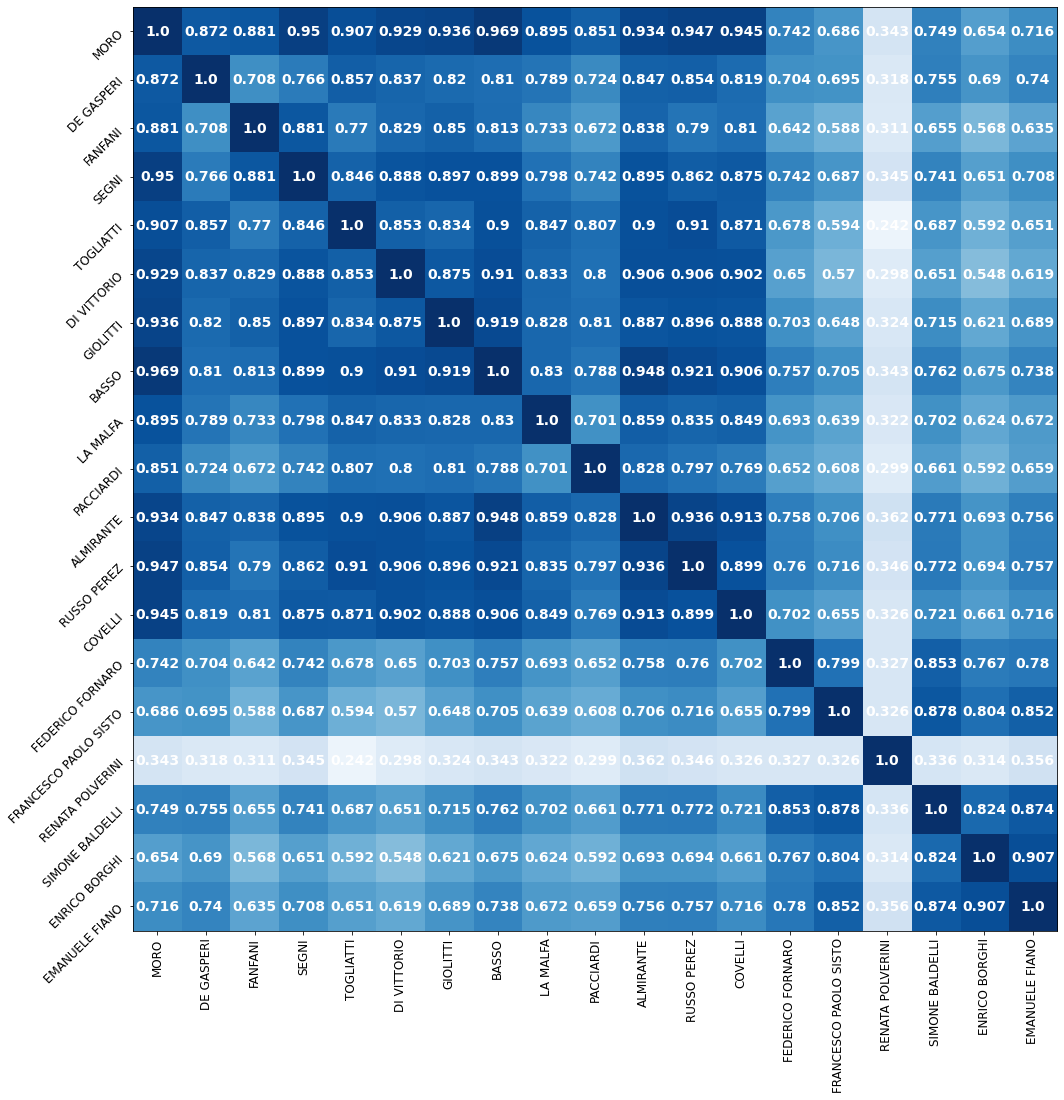

In [52]:
    #fig,ax= plt.subplots(2,2, figsize=(16,10))
    fig,ax= plt.subplots()
    
    ax.matshow(data, cmap=plt.cm.Blues, vmin=0.2, vmax=1,)
    #m = ax.imshow(harvest)
    
    for i in range(len(legis)):
        for j in range(len(legis)):
            c = data[j,i]
            ax.text(i, j, round(c,3), va='center', ha='center', color ='white', weight='bold', size=14)
    #ax.colorbar()
    #ax.set_title("Test error per la label: ", size = 20)
    #ax.xlabels("Lambda")
    
    ax.set_xticks(np.arange(len((legis))))
    ax.set_yticks(np.arange(len(legis)))

    ax.set_yticklabels(legis, size = 12, rotation = 45)
    ax.set_xticklabels(legis, size = 12,rotation = 90 )
    #plt.xlabel("Lambda", size=17, labelpad = 25)
    #plt.ylabel("Iterazioni", size = 17, labelpad = 25)
    
    #plt.colorbar(data=data)
    fig.set_size_inches(17, 17)
    ax.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)
    plt.show()
    #fig.savefig('img/testerrormatrix'+str(title[index])+'.png', dpi=100)
    #fig.savefig('matrixacc'+title[index]+'.png', dpi=100) #sistemare bene e poi salvare

## TFIDF frequency
Rifaccio la stessa cosa ma al posto che usare la frequenza uso TFIDF

In [53]:
tokens = lambda text: [x.lemma_ for x in nlp(text) if x.pos_ not in ['PUNCT', 'SPACE'] and not x.is_stop]
all_tokens = lambda text: [x.lemma_ for x in nlp(text) if x.pos_ not in ['PUNCT', 'SPACE']]

In [54]:
nlp.max_length = 2548747
#perchè ho così tanti problemi a fare TF? come faccio? devo rimuovere le stopwords? in realtà non ci sono

In [55]:
TF, k = {}, 0.5
cont = 0
separator = ' '


for cog in legis:
    text = all_legis[cog]
    text = [separator.join(elem) for elem in text]
    text = reduce(operator.concat, text)
   
    f = Counter(all_tokens(text)).most_common() #le stopwrods le ho già tolte
    
    maxf = f[0][1]
    TF[cog] = dict([(token, k + (1 - k) * (x / maxf)) for token, x in f])
    print(cog)

MORO
DE GASPERI
FANFANI
SEGNI
TOGLIATTI
DI VITTORIO
GIOLITTI
BASSO
LA MALFA
PACCIARDI
ALMIRANTE
RUSSO PEREZ
COVELLI
FEDERICO FORNARO
FRANCESCO PAOLO SISTO
RENATA POLVERINI
SIMONE BALDELLI
ENRICO BORGHI
EMANUELE FIANO


In [58]:
pprint(list(sorted(TF['COVELLI'].items(), key=lambda x: -x[1]))[:20])

[('’', 1.0),
 ('e', 0.9254694835680751),
 ('l', 0.7306338028169014),
 ('il', 0.7109741784037559),
 ('essere', 0.6387910798122065),
 ('onorevole', 0.5880281690140845),
 ('d', 0.5613262910798122),
 ('o', 0.5560446009389671),
 ('leggero', 0.5557511737089202),
 ('potere', 0.5531103286384976),
 ('dovere', 0.5492957746478874),
 ('volere', 0.5466549295774648),
 ('politico', 0.545774647887324),
 ('problema', 0.5349178403755869),
 ('italiano', 0.5328638497652582),
 ('presidente', 0.5325704225352113),
 ('votare', 0.5311032863849765),
 ('dare', 0.5311032863849765),
 ('venire', 0.5302230046948356),
 ('camera', 0.5296361502347418)]


In [59]:
words_tf = {}
for cog in legis:
    words_tf[cog] = list(TF[cog].keys())

In [60]:
def similarity_tf(cog, c, words_pair, TF):
    pol1 = {}
    pol2 = {}
      
    for w in words_pair:
        if w not in TF[cog]:
            pol1[w] = 0
        else:
            pol1[w] = TF[cog][w]
            
        if w not in TF[c]:
            pol2[w] = 0   
        else: 
            pol2[w] = TF[c][w]
            
    final_val = {}
    final_val[cog] = OrderedDict(sorted(pol1.items(), key=lambda t: t[0]))
    final_val[c] = OrderedDict(sorted(pol2.items(), key=lambda t: t[0]))
    
    only_val = {}
    only_val[cog] = []
    only_val[c] = []
    
    for k in final_val[cog].keys():
        only_val[cog].append(final_val[cog][k])
        
    for k in final_val[c].keys():
        only_val[c].append(final_val[c][k])
        
    return cosine_similarity([only_val[c]],[only_val[cog]])

In [61]:
data_tf = {}

for cog in legis:
    data_tf[cog] = []
    for c in legis:
        words_pair = set()
        words_pair = set(words_tf[cog]).union(set(words_tf[c]))
                
            
        val = similarity_tf(cog,c,words_pair, TF)
        data_tf[cog].append((c,val))
                

In [62]:
matrixdata_tf = []
for cog in legis:
    m = []
    for l in data_tf[cog]:
        m.append((round(float(l[1][0]),5)))
    matrixdata_tf.append(m)

In [63]:
data = np.array(matrixdata_tf)
    
data = data.transpose()
data = np.array(data)
shape = ( len(legis), len(legis) )
data = data.reshape( shape )
data = np.array(data)

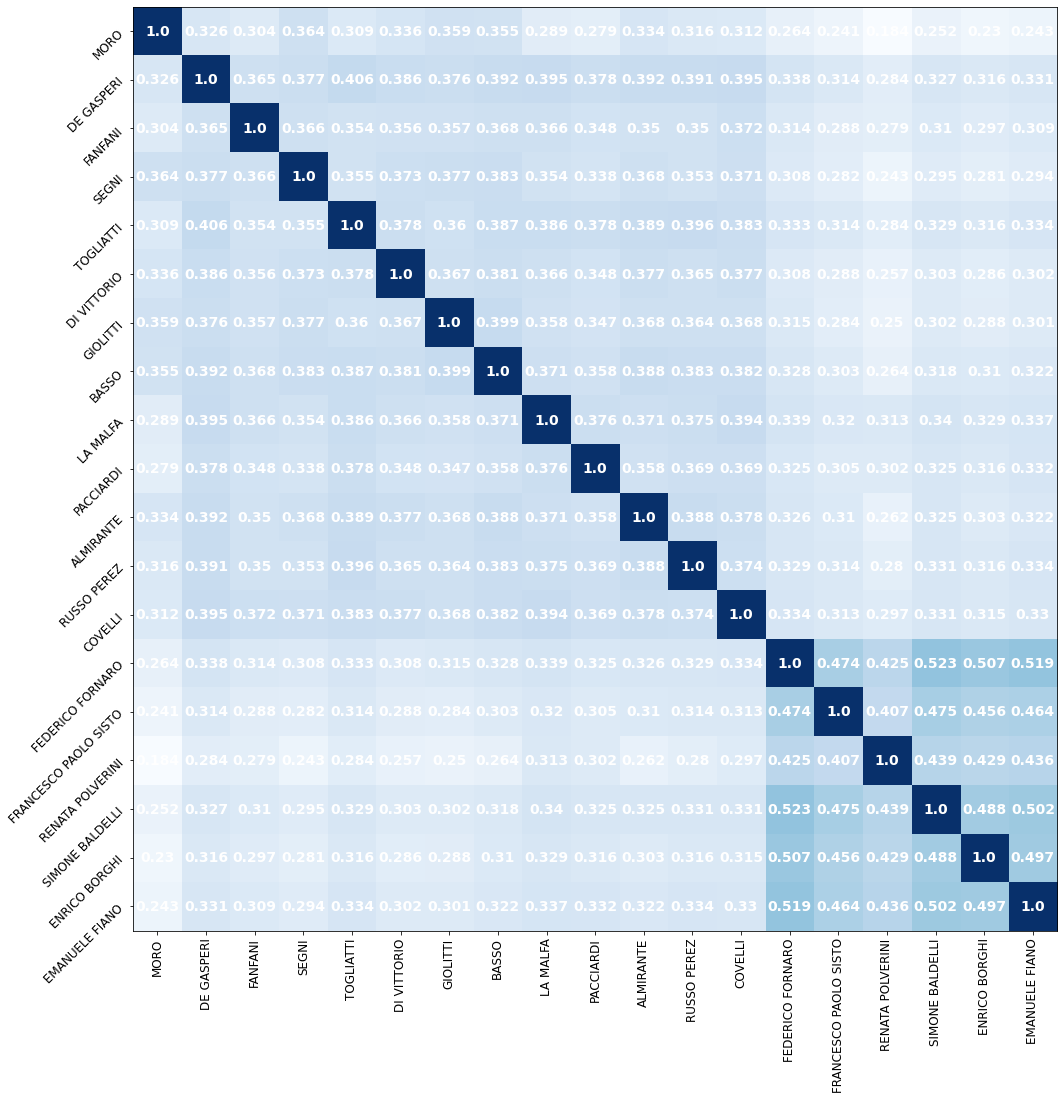

In [64]:
    #fig,ax= plt.subplots(2,2, figsize=(16,10))
    fig,ax= plt.subplots()
    
    ax.matshow(data, cmap=plt.cm.Blues, vmin=0.2, vmax=1,)
    #m = ax.imshow(harvest)
    
    for i in range(len(legis)):
        for j in range(len(legis)):
            c = data[j,i]
            ax.text(i, j, round(c,3), va='center', ha='center', color ='white', weight='bold', size=14)
    #ax.colorbar()
    #ax.set_title("Test error per la label: ", size = 20)
    #ax.xlabels("Lambda")
    
    ax.set_xticks(np.arange(len((legis))))
    ax.set_yticks(np.arange(len(legis)))

    ax.set_yticklabels(legis, size = 12, rotation = 45)
    ax.set_xticklabels(legis, size = 12,rotation = 90 )
    #plt.xlabel("Lambda", size=17, labelpad = 25)
    #plt.ylabel("Iterazioni", size = 17, labelpad = 25)
    
    #plt.colorbar(data=data)
    fig.set_size_inches(17, 17)
    ax.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)
    plt.show()
    #fig.savefig('img/testerrormatrix'+str(title[index])+'.png', dpi=100)
    #fig.savefig('matrixacc'+title[index]+'.png', dpi=100) #sistemare bene e poi salvare

In [ ]:
#dovei mettere TF a 0 per le parole non presenti ma che ci sono nel politico che sto confrontanto
#in word_embedding stavo salvando i discorsi_puliti della XVII legis, va fatto!

### TFIDF

In [65]:
DF, N = defaultdict(lambda: 0), len(legis)
for k, bow in TF.items():
    for t in bow.keys():
        DF[t] += 1
IDF = lambda x: np.log(N / DF[x])

In [66]:
TfIdf = {}
for k, bow in TF.items():
    TfIdf[k] = dict([(token, w * IDF(token)) for token, w in bow.items()])

In [67]:
for cog in legis:
    print(cog)
    pprint(list(sorted(TfIdf[cog].items(), key=lambda x: -x[1]))[:20])

MORO
[('scabinato', 1.4745889415514335),
 ('sublocazione', 1.4740953057247224),
 ('cooperatore', 1.4737003970633535),
 ('sinistro1950', 1.473502942732669),
 ('sinistro1949', 1.4733054884019845),
 ('adrano', 1.4733054884019845),
 ('destro1952', 1.4733054884019845),
 ('leggere1953', 1.4733054884019845),
 ('topo', 1.4732067612366422),
 ('leggere1950', 1.4732067612366422),
 ('casetta', 1.4732067612366422),
 ('macrelli', 1.4732067612366422),
 ('enal', 1.4732067612366422),
 ('possidente', 1.4731080340713),
 ('innovatore', 1.4731080340713),
 ('deputali1950', 1.4731080340713),
 ('deputato1950', 1.4731080340713),
 ('miglioratrice', 1.4731080340713),
 ('levantino', 1.4730093069059578),
 ('tuario', 1.4730093069059578)]
DE GASPERI
[('destropresidente', 1.4844117834928119),
 ('minislri', 1.4777060218425366),
 ('deputatopresidente', 1.477096407147057),
 ('consigzio', 1.4758771777560977),
 ('deputatzpresidente', 1.4752675630606182),
 ('canevari', 1.4746579483651385),
 ('randolfo', 1.474048333669659),

In [68]:
words_tfidf = {}
for cog in legis:
    words_tfidf[cog] = list(TfIdf[cog].keys())

In [69]:
data_tfidf = {}

for cog in legis:
    data_tfidf[cog] = []
    for c in legis:
        words_pair = set()
        words_pair = set(words_tfidf[cog]).union(set(words_tfidf[c]))
                
            
        val = similarity_tf(cog,c,words_pair, TfIdf)
        data_tfidf[cog].append((c,val))

In [70]:
matrixdata_tfidf = []
for cog in legis:
    m = []
    for l in data_tfidf[cog]:
        m.append((round(float(l[1][0]),5)))
    matrixdata_tfidf.append(m)

In [71]:
data = np.array(matrixdata_tfidf)
    
data = data.transpose()
data = np.array(data)
shape = ( len(legis), len(legis) )
data = data.reshape( shape )
data = np.array(data)

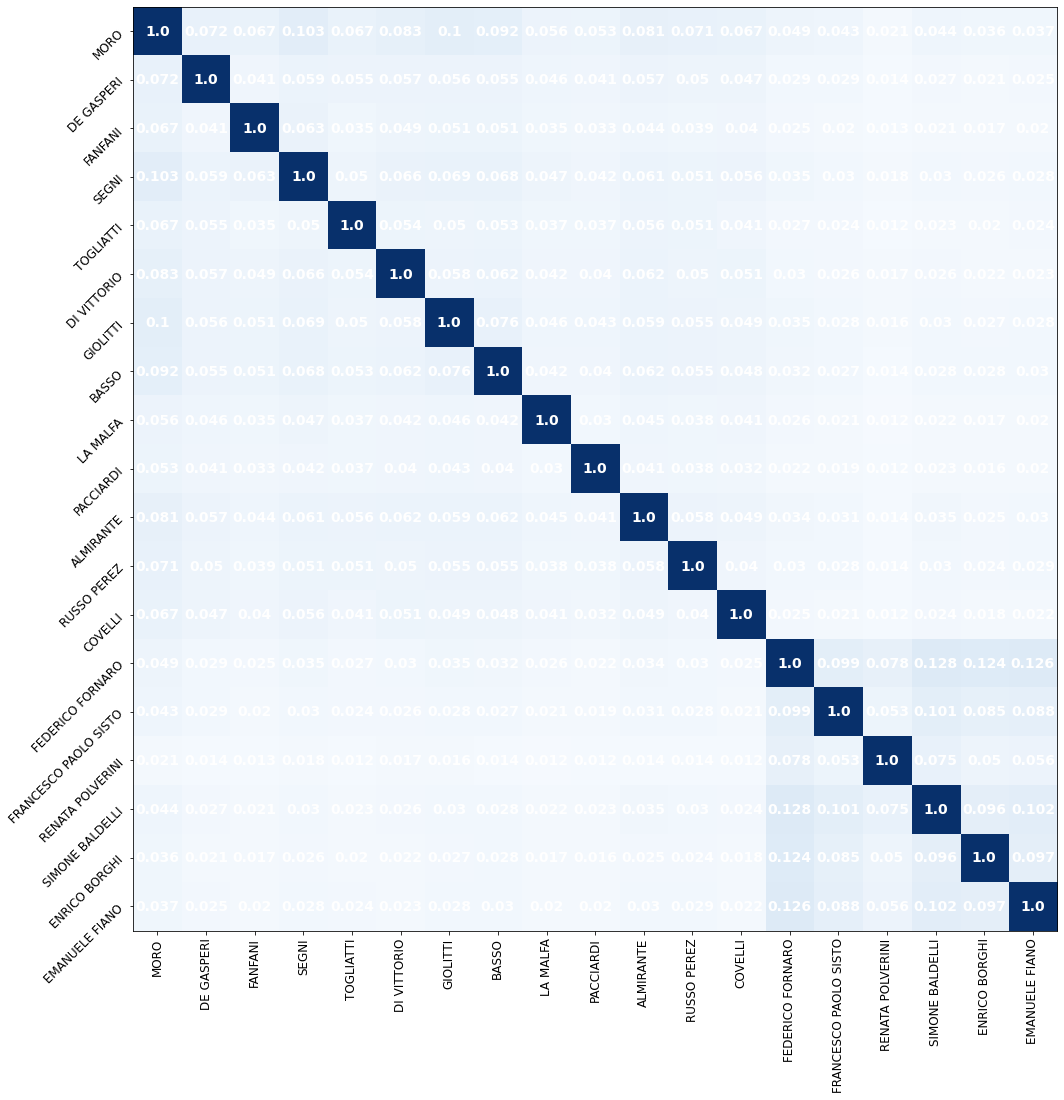

In [72]:
    #fig,ax= plt.subplots(2,2, figsize=(16,10))
    fig,ax= plt.subplots()
    
    ax.matshow(data, cmap=plt.cm.Blues, vmin=0, vmax=1,)
    #m = ax.imshow(harvest)
    
    for i in range(len(legis)):
        for j in range(len(legis)):
            c = data[j,i]
            ax.text(i, j, round(c,3), va='center', ha='center', color ='white', weight='bold', size=14)
    #ax.colorbar()
    #ax.set_title("Test error per la label: ", size = 20)
    #ax.xlabels("Lambda")
    
    ax.set_xticks(np.arange(len((legis))))
    ax.set_yticks(np.arange(len(legis)))

    ax.set_yticklabels(legis, size = 12, rotation = 45)
    ax.set_xticklabels(legis, size = 12,rotation = 90 )
    #plt.xlabel("Lambda", size=17, labelpad = 25)
    #plt.ylabel("Iterazioni", size = 17, labelpad = 25)
    
    #plt.colorbar(data=data)
    fig.set_size_inches(17, 17)
    ax.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)
    plt.show()
    #fig.savefig('img/testerrormatrix'+str(title[index])+'.png', dpi=100)
    #fig.savefig('matrixacc'+title[index]+'.png', dpi=100) #sistemare bene e poi salvare

## Word Embedding

In [9]:
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

In [10]:
def skip(sequence, n, s):
    k_grams = []
    for i in range(len(sequence)):
        for z in range(s):
            seq = [sequence[i]] + sequence[i+z+1:i+z+n]
            if len(seq) == n and seq not in k_grams:
                k_grams.append(tuple(seq))
    return k_grams

In [23]:
sequences = {}
seq = []

for cog in legis:
    seq = []
    for doc in all_legis[cog]: #devo rimuovere o no le stopwords? secondo me si 
            token = skip(doc, n=3, s=1)
            for a, b, c in token:
                seq.append([a, b, c])
    sequences[cog] = seq

In [24]:
#withsequences

models = {}
cont = 0
for cog, sequence in sequences.items():
        
        models[cog] = Word2Vec(sequences[cog], min_count=5)
        print(cog)
        print(cont)

MORO
0
DE GASPERI
0
FANFANI
0
SEGNI
0
TOGLIATTI
0
DI VITTORIO
0
GIOLITTI
0
BASSO
0
LA MALFA
0
PACCIARDI
0
ALMIRANTE
0
RUSSO PEREZ
0
COVELLI
0
FEDERICO FORNARO
0
FRANCESCO PAOLO SISTO
0
RENATA POLVERINI
0
SIMONE BALDELLI
0
ENRICO BORGHI
0
EMANUELE FIANO
0


In [40]:
print((models['MORO'].wv['senato']))

[-0.13235977  0.07370412 -0.21918385 -0.56793076  0.05383452  0.22650684
 -0.20428856  0.90792626  0.06462053  0.26525885  0.18805568  0.48740932
 -0.70436746 -0.12518674  0.3781751   0.3469002  -0.0384388  -0.49023515
  0.45761344 -1.0582668  -0.07290822 -0.21635868  0.36879054  0.17975523
 -0.3255623   0.41238168  0.22629994  0.06868967 -0.23831233  0.62410945
 -0.49657527 -0.12004722 -0.09388833 -0.7433811   0.01825498  0.1793178
  0.46663558 -0.61668915  0.4549859   0.02799039 -0.01295931  0.27878955
 -0.30542266  0.0147169   0.22850817 -0.61167806  0.31614736 -0.06046089
  0.28219488 -0.5486836   0.5065044   0.12605903  1.0564446  -0.3853748
 -0.16364561  0.7764302   0.29421496  0.1936169   0.31123185 -0.4761197
  0.4321463   0.34613195 -0.19024834  0.4711297   0.56647855  0.21845223
  0.01222984 -0.00397349  0.3965628   0.09060158  0.4948681   0.2797577
  0.20679091 -0.09190274 -0.61335504  0.31097257 -0.9606639  -0.15963084
  0.4412124   0.4236943   0.01049399 -0.28725463 -0.117

In [41]:
print((models['DE GASPERI'].wv['senato']))

[-0.02572232  0.1147778  -0.192073    0.11758828 -0.04220858 -0.06701568
 -0.08490022  0.34864452  0.30005756  0.04552853  0.24873255  0.18282807
 -0.29429024 -0.02418877  0.15728694  0.47301757 -0.20794632 -0.02769323
 -0.00073361 -0.230668   -0.04999933 -0.0931073   0.07728893 -0.0732839
 -0.20219138  0.20234783  0.3700434   0.15682505 -0.31106305  0.04248297
 -0.4230606  -0.22378829  0.23961793 -0.15045483  0.00997503  0.07812599
  0.2835988   0.02535649  0.11443848  0.11767636 -0.03099483  0.02286917
  0.10186075  0.10788145 -0.02727732 -0.29788452  0.1345647   0.03166346
  0.3665603  -0.3190696   0.04326707 -0.2482908   0.43519342 -0.42527738
 -0.10710008  0.28814     0.08158711  0.15433607  0.11937337  0.14488402
  0.04966523  0.00355834 -0.21019416 -0.01473871  0.22425899 -0.15700898
  0.07461257  0.03904258  0.25513643  0.05290007  0.20765992  0.5319402
  0.22426498 -0.08237616 -0.22437948  0.24040948 -0.35924065 -0.03884767
 -0.08214485  0.18552698  0.26358393 -0.09053527 -0.1

In [43]:
cosine_similarity([models['DE GASPERI'].wv['onorevole']],[models['DE GASPERI'].wv['leggere']])

array([[0.883185]], dtype=float32)

In [36]:
for cg in legis:
    for cog in legis:
        c = cosine_similarity([models[cg].wv['onorevole']],[models[cog].wv['onorevole']])
        print(cg + " "+ cog + " " + str(c))

MORO MORO [[1.]]
MORO DE GASPERI [[0.41206533]]
MORO FANFANI [[0.42694327]]
MORO SEGNI [[0.49789748]]
MORO TOGLIATTI [[0.35810193]]
MORO DI VITTORIO [[0.48368534]]
MORO GIOLITTI [[0.3470874]]
MORO BASSO [[0.4726419]]
MORO LA MALFA [[0.24272852]]
MORO PACCIARDI [[0.306077]]
MORO ALMIRANTE [[0.4568584]]
MORO RUSSO PEREZ [[0.25859207]]
MORO COVELLI [[0.40515572]]
MORO FEDERICO FORNARO [[0.24663365]]
MORO FRANCESCO PAOLO SISTO [[0.2201616]]
MORO RENATA POLVERINI [[0.29025358]]
MORO SIMONE BALDELLI [[0.2574037]]
MORO ENRICO BORGHI [[0.21057184]]
MORO EMANUELE FIANO [[0.36581883]]
DE GASPERI MORO [[0.41206533]]
DE GASPERI DE GASPERI [[0.9999999]]
DE GASPERI FANFANI [[0.79501826]]
DE GASPERI SEGNI [[0.66195875]]
DE GASPERI TOGLIATTI [[0.7075954]]
DE GASPERI DI VITTORIO [[0.65402824]]
DE GASPERI GIOLITTI [[0.61102366]]
DE GASPERI BASSO [[0.72074497]]
DE GASPERI LA MALFA [[0.6577981]]
DE GASPERI PACCIARDI [[0.68303597]]
DE GASPERI ALMIRANTE [[0.6790636]]
DE GASPERI RUSSO PEREZ [[0.73369235]]
DE

ENRICO BORGHI FANFANI [[0.631003]]
ENRICO BORGHI SEGNI [[0.4756207]]
ENRICO BORGHI TOGLIATTI [[0.67785686]]
ENRICO BORGHI DI VITTORIO [[0.5217399]]
ENRICO BORGHI GIOLITTI [[0.4554537]]
ENRICO BORGHI BASSO [[0.55426365]]
ENRICO BORGHI LA MALFA [[0.6109465]]
ENRICO BORGHI PACCIARDI [[0.6671162]]
ENRICO BORGHI ALMIRANTE [[0.6014366]]
ENRICO BORGHI RUSSO PEREZ [[0.62870514]]
ENRICO BORGHI COVELLI [[0.62442493]]
ENRICO BORGHI FEDERICO FORNARO [[0.73653686]]
ENRICO BORGHI FRANCESCO PAOLO SISTO [[0.6779327]]
ENRICO BORGHI RENATA POLVERINI [[0.7083253]]
ENRICO BORGHI SIMONE BALDELLI [[0.73565996]]
ENRICO BORGHI ENRICO BORGHI [[1.0000001]]
ENRICO BORGHI EMANUELE FIANO [[0.74772304]]
EMANUELE FIANO MORO [[0.36581883]]
EMANUELE FIANO DE GASPERI [[0.5524898]]
EMANUELE FIANO FANFANI [[0.65902495]]
EMANUELE FIANO SEGNI [[0.6145828]]
EMANUELE FIANO TOGLIATTI [[0.6363005]]
EMANUELE FIANO DI VITTORIO [[0.58562684]]
EMANUELE FIANO GIOLITTI [[0.5345209]]
EMANUELE FIANO BASSO [[0.58593494]]
EMANUELE FIANO

In [29]:
word = 'onorevole'
for genre, model in models.items():
        print(genre, [x[0] for x in model.wv.most_similar(positive=word)][:5])

MORO ['revoli', 'evoli', 'gasperi', 'martino', 'oliorevoli']
DE GASPERI ['l', 'italia', 'ordine', 'nenni', 'togliatti']
FANFANI ['l', 'ordine', 'articolare', 'emendamento', 'operare']
SEGNI ['ordine', 'emendamento', 'articolare', 'miceli', 'accettare']
TOGLIATTI ['italia', 'd', 'accordare', 'europa', 'altro']
DI VITTORIO ['emendamento', 'italia', 'l', 'articolare', 'scelba']
GIOLITTI ['italia', 'l', 'esercizio', 'c', 'collego']
BASSO ['l', 'articolare', 'd', 'estremo', 'internare']
LA MALFA ['italia', 'z', 'accordare', 'c', 'ordine']
PACCIARDI ['potere', 'essere', 'guerra', 'dovere', 'e']
ALMIRANTE ['articolare', 'altro', 'accordare', 'l', '1']
RUSSO PEREZ ['italia', 'accordare', 'inghilterra', 'c', 'articolare']
COVELLI ['signore', 'emendamento', 'italia', 'industriare', 'ordine']
FEDERICO FORNARO ['comporre', 'dubbio', 'ascoltare', 'riunione', 'voce']
FRANCESCO PAOLO SISTO ['unico', 'esigenza', 'espressione', 'quell', 'indicazione']
RENATA POLVERINI ['augurare', 'italia', 'diverso', 

In [74]:
words_w2v = {}
for cog in legis:    
    words_w2v[cog] = list(models[cog].wv.vocab)

In [162]:
def similarity_w2v(cog, c, words_pair, models):
    pol1 = {}
    pol2 = {}
    pca = PCA(n_components=1)
      
    for w in words_pair:
        if w not in models[cog].wv:
            pol1[w] = None #non va bene 0 perchè non è una frequenza ma una posizione nello spazio
        else:
            pol1[w] = pca.fit_transform(models[cog].wv[w])
            
        if w not in models[c].wv:
            pol2[w] = None   
        else: 
            pol2[w] = pca.fit_transform(models[c].wv[w])
            
    final_val = {}
    final_val[cog] = OrderedDict(sorted(pol1.items(), key=lambda t: t[0]))
    final_val[c] = OrderedDict(sorted(pol2.items(), key=lambda t: t[0]))
    
    only_val = {}
    only_val[cog] = []
    only_val[c] = []
    
    for k in final_val[cog].keys():
        only_val[cog].append(final_val[cog][k])
        
    for k in final_val[c].keys():
        only_val[c].append(final_val[c][k])
        
    return cosine_similarity([only_val[c]],[only_val[cog]])

In [163]:
data_w2v = {}

for cog in legis:
    data_w2v[cog] = []
    for c in legis:
        words_pair = set()
        words_pair = set(words_w2v[cog]).union(set(words_w2v[c]))
        
        val = similarity_w2v(cog,c,words_pair, models)
        data_w2v[cog].append((c,val))

ValueError: Expected 2D array, got 1D array instead:
array=[-0.03269196  0.01786629 -0.01198734  0.01691493 -0.01540586 -0.00543142
 -0.01646865  0.07577077  0.02047068  0.00255641  0.01322724  0.07018746
 -0.09117371 -0.035983   -0.00628143  0.05096368 -0.04089342  0.01433161
 -0.01337835 -0.0762029   0.00461939 -0.02936207  0.01243169 -0.04734519
 -0.02684611  0.0395108   0.03901735  0.08166476 -0.07502171  0.01796304
 -0.07823656 -0.02679565  0.05258627 -0.04409081 -0.04854087  0.01679655
  0.04430104 -0.05307003  0.02961862  0.04540702 -0.02571494 -0.02460028
  0.01325073  0.01299109 -0.00162935 -0.07190368  0.00275707 -0.0190782
  0.0428385  -0.03111311 -0.01279955 -0.04637345  0.13053496 -0.06804481
 -0.0436284   0.07153381  0.02957961  0.03261288  0.03551245 -0.02045908
  0.01498296  0.00909187 -0.0401687  -0.01063745  0.05294376  0.0032617
 -0.0293096   0.01639605  0.05388034  0.00092612  0.00544097  0.04936095
  0.03715486 -0.03647596 -0.07477274  0.05284204 -0.09075608  0.00313531
  0.04192412  0.03519091  0.0572959  -0.02258446 -0.02203994  0.04372418
 -0.02147428  0.0199998  -0.01003586 -0.02945905 -0.00191572 -0.03492812
 -0.05381525  0.01954478 -0.02901461 -0.01742929  0.05385924 -0.03469692
  0.01190173  0.00455953  0.0027659  -0.08167028].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [161]:
for word in models['MORO'].wv.vocab:
    print(word)
    print(models['MORO'].wv[word])

d
[-1.0283679   0.59611887  0.43161944  0.39994308  0.03253413 -0.45896173
 -0.44818884  0.680519   -0.1073017   0.6831744   0.36792615  0.14430134
 -0.7564495   0.44691855 -0.20573045  0.69385904  0.4736188   0.47978345
 -0.4268273  -0.3366451   0.1779304  -0.2537581   0.48599392 -0.5055571
  0.01494458  0.32497066 -0.12418763  0.17795938  0.37740004  0.6016397
 -0.37465498  0.68511295  0.2577583  -0.49806324 -0.51380986  0.84645337
  0.03827459 -0.37175742 -0.34036052  0.61325    -0.44643277  0.06816056
 -0.35297343  0.8775979   0.33779234 -0.3102484   0.5908075  -0.3276524
  0.3788542  -0.5479011  -0.03895393 -0.64204407  0.6231207  -0.6698525
  0.74432707  0.09223236  0.09703211  0.5760346   0.14665195  0.34115583
  0.36632636  0.00197277 -0.25393835  0.57230633  0.3139184  -0.68116623
 -0.40045798  0.09012952  0.88114333 -0.56728566  0.29560143  0.77480894
  0.1397981   0.24139477 -0.39152315  0.38149297 -0.8484087  -0.14259471
  0.21409142  0.18670194  0.849922    0.18089277 -0.2

  0.01675345  0.01093817 -0.00979628 -0.12934478]
indu-
[-0.0573531   0.00661741  0.00481166  0.02779278 -0.0541903  -0.02603343
 -0.04423264  0.16746862  0.07648909  0.01726482  0.04384572  0.16044943
 -0.21587113 -0.0837147   0.00121032  0.12229388 -0.07139593  0.05227141
 -0.02858832 -0.24289306  0.00924566 -0.06112657  0.03424276 -0.08079692
 -0.10652099  0.10041694  0.08533428  0.18119684 -0.13708131  0.06230954
 -0.23426984 -0.02908839  0.1214041  -0.09328882 -0.1328113   0.07161746
  0.10132578 -0.07666437  0.01847762  0.15813468 -0.12120593 -0.06335494
  0.04263219  0.05852768 -0.0026953  -0.15923302  0.00929878 -0.06081653
  0.11694217 -0.06065875 -0.05305778 -0.11239221  0.30298588 -0.21062388
 -0.0794668   0.18055977  0.11572139  0.06163304  0.12076671 -0.05765577
  0.00602606  0.03829603 -0.11047075 -0.00757132  0.14017537  0.02393329
 -0.1137053  -0.00669934  0.13314821  0.00305282  0.03460214  0.10042292
  0.11492798 -0.08631188 -0.16838305  0.1177815  -0.22686578 -0.0057

  0.30116215  0.19479463  0.21714537 -0.08960292]
occorrere
[ 2.3216054e-02  1.0265215e-01 -5.2071661e-02 -1.7865662e-02
 -1.8079391e-01 -2.7421597e-02 -1.4543992e-01  4.2249098e-01
  8.4611438e-02  1.1821982e-02  1.9800565e-01  3.7758160e-01
 -6.9770545e-01 -1.4391609e-01  7.4054927e-02  1.4034487e-01
 -7.8313202e-02  1.6071360e-01 -6.0918614e-02 -4.4734088e-01
  8.0766544e-02 -1.5499476e-01  3.8884298e-03 -1.5172368e-01
 -7.3162057e-02  3.8476470e-01  1.6923101e-01  2.2543967e-01
 -2.2455221e-01  2.2361816e-01 -4.6958977e-01 -4.6588510e-02
  1.6850069e-01 -2.8228489e-01 -2.7152950e-01  1.8363734e-01
  1.9730245e-01 -1.5106080e-01  9.8311335e-02  2.1173815e-01
 -1.0380313e-01 -2.8701928e-01 -5.3594377e-02  2.0485118e-02
 -1.2306255e-01 -4.7136220e-01 -5.7636555e-03  5.5164527e-02
  8.3928049e-02 -1.6451809e-01 -1.5083726e-01 -3.1562561e-01
  7.6251465e-01 -3.9831838e-01 -1.7311357e-01  3.1294930e-01
  1.9335692e-01 -2.5273799e-03  1.2994951e-01 -1.7644861e-01
  1.5223283e-01  1.855546

  0.03368155  0.00119355  0.04546559 -0.24620356]
espropriare
[-0.11102472  0.08882314 -0.05467115  0.07300036 -0.10119635 -0.02455151
 -0.08597443  0.2394874   0.15309474  0.00556149  0.07393129  0.30877602
 -0.36141253 -0.18152495 -0.052285    0.2586722  -0.12681483  0.06815485
 -0.0858473  -0.331968   -0.05165974 -0.14832231 -0.00236385 -0.23025374
 -0.18570343  0.16727619  0.1978505   0.24844034 -0.23056753  0.00303832
 -0.27149397 -0.11387919  0.22773972 -0.1767739  -0.19168389  0.09507183
  0.18275958 -0.2255196   0.11928439  0.21757825 -0.18402417 -0.1792875
  0.10065989  0.02483244  0.0238235  -0.28036132 -0.01029891 -0.09438671
  0.13920802 -0.06260015 -0.08709379 -0.25196448  0.4530624  -0.2683987
 -0.15254883  0.26291314  0.1260221   0.10104423  0.09550188 -0.09853972
  0.01619649  0.06273247 -0.18225123  0.02152643  0.23282649  0.06397355
 -0.09315608  0.02865908  0.20193489 -0.02558882  0.06418396  0.16446388
  0.17898996 -0.16939229 -0.31574166  0.18725674 -0.32676366  0.

  0.03122977  0.05469659  0.00126757 -0.280123  ]
tore
[-0.11782792  0.06520234 -0.06008497 -0.01060768 -0.04749811  0.00333367
 -0.04984784  0.38448712  0.10086015  0.00913243  0.05911298  0.32590646
 -0.45655158 -0.18558037 -0.00768557  0.2301677  -0.18240893 -0.00794987
 -0.03296185 -0.45353317  0.00495753 -0.10376849  0.11770159 -0.18992777
 -0.15592575  0.20781913  0.19310765  0.3897585  -0.344803    0.08700841
 -0.40847585 -0.16083546  0.18785319 -0.2597168  -0.23360416  0.10668575
  0.21546738 -0.21526225  0.1660603   0.20432776 -0.12670293 -0.08975571
  0.08070385  0.00718212  0.01694252 -0.35011977  0.0337608  -0.05387078
  0.21851961 -0.17787257 -0.00326414 -0.152318    0.6250761  -0.32932124
 -0.18479265  0.36736116  0.15883346  0.07758876  0.190061   -0.11351054
  0.09540311  0.04570548 -0.16593078 -0.01788804  0.2830503   0.10182275
 -0.11853547  0.0382348   0.25423637  0.1076042   0.04803661  0.20080423
  0.21293771 -0.18237643 -0.3757412   0.2565704  -0.49070907 -0.00490

  0.02362688  0.01098181  0.07381885 -0.3647258 ]
clcll
[-0.03551435  0.01319571  0.00368208  0.01818746 -0.0157692  -0.01551537
 -0.01360612  0.04956981  0.02701363  0.00975973  0.01261732  0.05618313
 -0.06517636 -0.03152584 -0.00848414  0.04903301 -0.02392068  0.02041638
 -0.01592102 -0.06518199 -0.00142654 -0.02585993  0.01161671 -0.03630137
 -0.04165672  0.03416885  0.04230687  0.05954613 -0.04619626  0.01646373
 -0.07083419 -0.02437572  0.03824606 -0.03678281 -0.04665579  0.0165457
  0.04087692 -0.0420528   0.01158304  0.04789201 -0.03763033 -0.02465394
  0.01809144  0.01875966 -0.00157637 -0.05288064 -0.00088703 -0.02320978
  0.04292344 -0.01815492 -0.00908722 -0.04023152  0.09168144 -0.06610788
 -0.02064841  0.0587802   0.03117969  0.03286314  0.03446599 -0.0163168
 -0.00453363  0.00897276 -0.03808774 -0.00927979  0.05634644  0.00537283
 -0.02382899 -0.00618363  0.05072965 -0.00251857  0.0093736   0.03213237
  0.03675875 -0.0155354  -0.06744678  0.0469932  -0.07061102  0.004480

 -0.03579809  0.04567565  0.17189522 -0.34264693]
rendere
[-1.88921332e-01 -4.99684274e-01 -5.47881067e-01  1.87080070e-01
  5.21426857e-01  4.81690258e-01 -3.63334149e-01  9.22754169e-01
  4.53434944e-01 -2.74918556e-01  1.02559656e-01  9.03799415e-01
 -9.26018000e-01 -2.73071080e-01 -2.72493452e-01  9.26993266e-02
 -4.51733053e-01 -7.49948621e-02  2.68306047e-01 -6.98686242e-01
 -3.31460863e-01  5.09741865e-02 -6.71614185e-02 -1.15440562e-01
  2.46317595e-01  2.83557355e-01  1.69224188e-01  2.80365527e-01
 -3.35582137e-01 -4.77928258e-02 -3.55518728e-01 -1.59613445e-01
  2.08351016e-01 -5.17892838e-01 -3.81084114e-01 -1.68936297e-01
  2.36790121e-01  2.53950387e-01  6.01284683e-01  2.40715891e-01
  4.62164611e-01 -4.29519087e-01 -4.99755979e-01 -9.17475596e-02
 -5.29987402e-02 -2.20229790e-01  3.17925125e-01  1.24746189e-01
  3.12407285e-01 -2.94505507e-01 -4.09481227e-01  6.95353448e-02
  3.84196937e-01 -3.91054422e-01 -1.41480535e-01  5.81403553e-01
  1.39701188e-01 -8.59768614e-02

  0.01682703  0.01895003 -0.01597778 -0.09292856]
offrire
[ 0.04808567  0.06987846 -0.12824202  0.04860027 -0.11952492 -0.04523109
 -0.16260903  0.4705388   0.11375161 -0.01754114  0.11495482  0.4055834
 -0.55431277 -0.12880413 -0.01526165  0.19631176 -0.24918497  0.15462957
 -0.10295711 -0.48057348  0.07920499 -0.08962318  0.02817277 -0.18913715
 -0.12671697  0.23495279  0.10039445  0.330793   -0.3000034   0.10402339
 -0.49898705 -0.06746639  0.35199004 -0.21355002 -0.3014319   0.2662919
  0.16312328 -0.10274883  0.1148462   0.24642868 -0.160895   -0.21582316
  0.06386385  0.01952341 -0.05544336 -0.42698792  0.02482151  0.0295419
  0.19471669 -0.08104859 -0.13949902 -0.30764735  0.6690575  -0.39595217
 -0.22460423  0.29741064  0.17307375  0.0133187   0.15496919 -0.12753706
  0.06673786  0.02066847 -0.23417732  0.00561713  0.1867948   0.03274679
 -0.20078729  0.2173847   0.20827836  0.01222611  0.08304508  0.28930223
  0.18641612 -0.2796729  -0.36524495  0.24579498 -0.46621588  0.01649

nazione
[-2.57343054e-01  2.68380672e-01 -7.49917105e-02  1.49289057e-01
 -5.32917343e-02 -2.70330846e-01 -3.35852951e-01  6.24335885e-01
 -1.96925774e-01  2.34581590e-01 -2.31531989e-02  2.60933369e-01
 -5.76987207e-01  6.42205700e-02 -9.25744101e-02  9.58286449e-02
 -3.47015947e-01  3.51309687e-01 -4.66837496e-01 -1.28141552e-01
  2.00703546e-01 -1.20237209e-01  9.38779935e-02 -3.18366528e-01
  1.53591022e-01  1.33394778e-01  4.58874404e-02  4.92668778e-01
 -3.34220231e-01  1.11495912e-01 -7.19726264e-01  9.11706388e-02
  3.71709853e-01 -1.11575030e-01 -5.40174842e-01  6.10506952e-01
 -2.12370860e-03 -2.16151960e-02 -2.47649625e-01  4.69736934e-01
 -1.69197321e-01 -1.37461964e-02 -4.84641679e-02  3.82970780e-01
 -7.68811479e-02 -4.45510298e-01  1.60067707e-01 -5.01757935e-02
  3.32657993e-01 -1.14710912e-01 -1.58839762e-01 -4.51357573e-01
  7.31310308e-01 -4.07427758e-01 -1.05801895e-01  1.36799693e-01
 -7.52568170e-02  2.28311032e-01  1.29514813e-01  1.78711578e-01
  2.63264775e-01 

speciale
[ 0.02860612  0.13620234 -0.07169411 -0.08254103 -0.13251446 -0.01202641
 -0.23388906  0.38212806  0.13114113  0.01201661  0.28823176  0.45849892
 -0.56213814 -0.2251803   0.08036349  0.35441196 -0.07960212 -0.00721178
  0.07221165 -0.61319757  0.0043675  -0.2016592   0.06694506  0.06413896
 -0.31148905  0.30458295  0.1619614  -0.02686283 -0.10028601  0.21511915
 -0.44937035 -0.14895944  0.22980808 -0.4090436  -0.07441224  0.16262826
  0.21704774 -0.4645078   0.24096861  0.11814557 -0.19001196 -0.13952738
  0.06002448  0.01433638 -0.05818628 -0.46904844  0.04808918 -0.02909126
  0.08755798 -0.14162882 -0.06777283 -0.39089718  0.6526744  -0.28549704
 -0.12737064  0.41534737  0.24570574  0.05787345 -0.00776007 -0.11238249
 -0.01546556  0.21755067 -0.38146448  0.2267988   0.3474989   0.10472959
 -0.06916706  0.11304744  0.20851575 -0.08229643  0.30494463  0.20064096
  0.11951915 -0.04875843 -0.3775157   0.20645402 -0.52414984 -0.00756498
  0.14077497  0.46482104  0.33985895 -0.04

 -9.7462919e-04  2.4960892e-02  2.4724774e-01 -3.1106877e-01]
trentennale
[-2.46186424e-02  2.62777470e-02 -1.56903844e-02  3.46551463e-02
 -1.61233991e-02 -1.55156245e-02  1.59797363e-03  5.97353131e-02
  2.83377655e-02 -1.64155439e-02  1.22438995e-02  6.42489195e-02
 -7.11968094e-02 -3.95936780e-02 -3.51952277e-02  5.08415326e-02
 -5.45920059e-02  2.70277336e-02 -2.07655523e-02 -5.86185865e-02
 -1.28369695e-02 -1.70304012e-02 -5.79813542e-03 -7.30516165e-02
 -3.96475457e-02  3.96118164e-02  5.43469451e-02  7.46122375e-02
 -8.03430974e-02 -5.05463732e-03 -6.17968366e-02 -4.33644243e-02
  6.39715344e-02 -3.33100744e-02 -3.87256145e-02  3.29689495e-03
  4.81417738e-02 -4.38493341e-02  2.70033367e-02  4.26707938e-02
 -2.62526926e-02 -4.85824011e-02  3.45498994e-02  3.83140985e-03
 -4.88796504e-03 -6.44514486e-02 -1.27869342e-02 -1.14979157e-02
  2.59835832e-02 -1.55399833e-02 -3.11229602e-02 -5.02111651e-02
  1.14105217e-01 -4.78837080e-02 -5.20516261e-02  5.25277853e-02
  2.33806521e-02

 -0.00113835 -0.00309909  0.01237848 -0.07355694]
lino
[-0.20252952  0.04450531 -0.05908117  0.14418897 -0.04398573 -0.03913815
  0.07154546  0.3243253   0.20813821 -0.06774766  0.05728647  0.29512006
 -0.2932353  -0.20828505 -0.10287187  0.25845793 -0.23780034  0.09500924
 -0.06607139 -0.3707687  -0.03994448 -0.06241214  0.01636509 -0.3091067
 -0.18582416  0.18716359  0.24084502  0.44669276 -0.42913133  0.04561691
 -0.31167275 -0.1804682   0.25184476 -0.15924671 -0.18238914 -0.05738323
  0.26078448 -0.21305323  0.13696904  0.2007005  -0.14184    -0.20198902
  0.10079045  0.02746473  0.01338268 -0.2299297  -0.01327255 -0.09502113
  0.25204694 -0.14092624 -0.11277236 -0.15802066  0.50636995 -0.30847868
 -0.18688335  0.34180003  0.1755316   0.14328037  0.1852029  -0.13271879
 -0.01298441  0.06709968 -0.17908095 -0.11000124  0.30472896  0.04968599
 -0.17282674  0.05109969  0.23696025  0.04995036 -0.07090251  0.19869123
  0.19407414 -0.09340607 -0.41430804  0.29729855 -0.31518131  0.027014

 -0.01176641  0.00171651  0.04600694 -0.23403692]
murgia
[-0.10267674  0.07512289 -0.04291223  0.04257705 -0.02658284 -0.0285401
  0.02165169  0.22829874  0.08121121 -0.00396329  0.01988607  0.16492307
 -0.19439057 -0.10426281 -0.04867108  0.1289038  -0.15180032  0.06681627
 -0.04282093 -0.20323668 -0.00834637 -0.05001399  0.02001037 -0.1786347
 -0.09541594  0.11358535  0.13473329  0.2663036  -0.23972674  0.0466371
 -0.20488364 -0.11167557  0.13141477 -0.12598103 -0.11827353  0.01724021
  0.14814807 -0.12418904  0.06671361  0.11033245 -0.07535551 -0.08527372
  0.04392122  0.01944611  0.0029877  -0.18605417 -0.00744338 -0.04824405
  0.13945201 -0.10436061 -0.03295052 -0.11038413  0.35766268 -0.20289256
 -0.12625639  0.19941717  0.07179762  0.08545501  0.11225895 -0.07611043
  0.04506419  0.01040472 -0.0997883  -0.06612775  0.17623997 -0.00128013
 -0.07391061  0.04820606  0.1648385   0.0387927  -0.01575511  0.12789647
  0.09387555 -0.06961507 -0.2444105   0.17161974 -0.21712792  0.020375

  2.67229159e-03  3.35932747e-02  8.37682337e-02 -4.12204742e-01]
-49
[-0.17973381  0.0822734   0.11425836  0.07855886 -0.16128427 -0.05989508
 -0.10900076  0.06180605  0.18770505  0.06397401  0.03732206  0.29682738
 -0.3274425  -0.21198806 -0.06283445  0.3458319  -0.03347607 -0.06604733
 -0.00341312 -0.40600362 -0.09852546 -0.27081487  0.09460091 -0.19069025
 -0.31039044  0.13646498  0.32189408  0.163999   -0.17610174 -0.0364181
 -0.24886888 -0.12504275  0.20740737 -0.242328   -0.2456738   0.01030452
  0.19949229 -0.39964378  0.1345769   0.19195627 -0.27854782 -0.14772746
  0.13978107  0.07654977  0.08648166 -0.20759751  0.04357306 -0.23823103
  0.17475796 -0.01848357 -0.03645802 -0.26239696  0.35028568 -0.21647926
 -0.11696753  0.3077372   0.23709227  0.20106904  0.10759296 -0.07725486
 -0.03044091  0.11573283 -0.21964775  0.0629615   0.35000688  0.10853063
 -0.07828186 -0.17392401  0.29986927 -0.00147198  0.12255505  0.10552491
  0.3155045  -0.17839377 -0.32517853  0.15477501 -0.316

  0.02514273 -0.00307465 -0.0230819  -0.09781849]
investimento
[ 0.0973057  -0.01684037  0.05635863  0.11964919 -0.2486864  -0.04163352
 -0.2902703   0.14276935  0.33454224  0.02890681  0.20825887  0.575198
 -0.5162011  -0.277789   -0.08960989  0.25993916 -0.11560064  0.33455852
 -0.11752812 -0.4127358  -0.02617897 -0.19475019 -0.0375509  -0.07805079
 -0.28102544  0.3464374   0.10535342  0.31248438  0.04399635  0.08902597
 -0.4775303  -0.07402618  0.345872   -0.14903894 -0.34269175  0.28667963
  0.0743318  -0.16866069  0.03480076  0.38876846 -0.33125153 -0.31944367
  0.0139569   0.09034092 -0.06412987 -0.36020973 -0.00578037 -0.16101326
  0.15131997  0.04299406 -0.349888   -0.50816554  0.542322   -0.5072169
 -0.28318125  0.27906233  0.26115564  0.14421298  0.15964635  0.0261583
 -0.2058051   0.06037411 -0.33108145  0.02943247  0.1726778   0.09328675
 -0.29807812  0.06721105  0.2072116  -0.11478426  0.06823366  0.08720545
  0.37851587 -0.3430988  -0.27845034  0.09403609 -0.32058027  0.0

  0.01286901 -0.00384918  0.0324305  -0.11756183]
gresso
[-0.03233856  0.03689609 -0.0246535   0.02174721 -0.04683746 -0.02087539
 -0.00936424  0.13618861  0.07078495 -0.01581912  0.02267837  0.14299233
 -0.17510404 -0.0863305  -0.03952704  0.09959485 -0.09387358  0.04836784
 -0.04210741 -0.15849178 -0.01541644 -0.05208977  0.0158148  -0.12242571
 -0.081559    0.10060699  0.09655933  0.16725095 -0.13353002  0.02219293
 -0.15575592 -0.07536715  0.11386196 -0.08075939 -0.0989123   0.0359608
  0.08475912 -0.09722469  0.04185712  0.10196212 -0.07402249 -0.09377158
  0.04016901  0.01571834 -0.00275782 -0.14714819 -0.00608548 -0.04218985
  0.08261958 -0.04644904 -0.06010387 -0.10226866  0.2561586  -0.15716873
 -0.09560359  0.14512797  0.07204381  0.04931385  0.07211494 -0.05135579
  0.01202549  0.02715246 -0.07025796 -0.02622303  0.12034436  0.0311611
 -0.05329335  0.02350851  0.11192682  0.01539785 -0.00497923  0.09316081
  0.09740908 -0.09174493 -0.15864615  0.09784683 -0.17396227  0.00771

 -1.60075680e-04  3.39892204e-03  2.87568122e-02 -1.32902041e-01]
fascismo
[-0.15873128  0.13722153 -0.13384962  0.03883718 -0.0927128  -0.02194795
 -0.1512664   0.41431698  0.00211797  0.14657526 -0.02148328  0.33133247
 -0.5186485  -0.06868812 -0.09333555  0.15563811 -0.24792904  0.13479021
 -0.13875559 -0.27497643 -0.00668498 -0.18818386  0.07681483 -0.36316308
  0.00278162  0.17313157  0.18056478  0.3943867  -0.3326289   0.04461974
 -0.4313713  -0.14819776  0.24219076 -0.25849706 -0.37273332  0.2452946
  0.1658884  -0.16423863  0.06286077  0.23516686 -0.11909728 -0.12879291
  0.05822776  0.10031658  0.04149973 -0.3975002   0.05937503 -0.10714342
  0.15123646 -0.13383146 -0.03040199 -0.2460612   0.6698092  -0.33970013
 -0.2167976   0.26794022  0.03925086  0.1289687   0.12087834 -0.05189261
  0.23331007 -0.06991774 -0.14557101 -0.06049398  0.2261471  -0.021433
 -0.04539955  0.11917658  0.40871152  0.04408773  0.09456462  0.26558095
  0.16355495 -0.32466727 -0.3192775   0.23310426 -0.

 -0.00083121  0.0081398   0.02389242 -0.09513987]
denun
[-0.07530829  0.05933063 -0.03331336  0.04555327 -0.01989175 -0.0235032
 -0.01574054  0.13319562  0.06662176 -0.0044072   0.02011125  0.12968831
 -0.15904953 -0.08343999 -0.0375326   0.1097399  -0.08387364  0.04102397
 -0.03815544 -0.14766736 -0.02180686 -0.05555941  0.00059729 -0.13343701
 -0.07672251  0.0751314   0.09646232  0.1566976  -0.13785468  0.01131591
 -0.12801288 -0.07856226  0.1044423  -0.0800238  -0.0942398   0.03091414
  0.10047167 -0.0904036   0.05272227  0.08737189 -0.05933628 -0.07461535
  0.04638103  0.00549057  0.00351732 -0.13182019 -0.0175944  -0.04343846
  0.07031899 -0.05087318 -0.03582469 -0.09978562  0.23908122 -0.13017279
 -0.07708793  0.11840871  0.04012908  0.0627907   0.05442466 -0.04727341
  0.02275974  0.01075956 -0.08046555 -0.032541    0.11308021 -0.00168611
 -0.04217612  0.02437245  0.10030367  0.00357779  0.00170666  0.09363823
  0.07948874 -0.06767562 -0.1592178   0.11061489 -0.14936323  0.01192

  0.08521459  0.00498228  0.05743216 -0.34847242]
interruzione
[-2.42888585e-01  1.26089856e-01 -8.80907848e-02 -3.51617150e-02
 -3.56817357e-02 -4.51879352e-02 -1.84121728e-01  4.48085159e-01
 -4.55625653e-02  1.98979914e-01 -5.25159724e-02  2.38229409e-01
 -3.38891178e-01  1.67140570e-02  8.88083950e-02  2.79994011e-01
 -1.44783810e-01 -1.34714339e-02  2.59842351e-02 -4.68701720e-01
  5.20278066e-02 -3.57972592e-01  1.65475056e-01 -2.16390073e-01
 -8.75348300e-02  9.01464894e-02  1.15602314e-01  4.15190905e-01
 -3.85814905e-01  9.00880694e-02 -4.71730292e-01  1.20848157e-02
  1.35029435e-01 -2.39481106e-01 -3.65915298e-01  2.68806547e-01
  2.16448113e-01 -2.53715098e-01  4.76493966e-04  2.06696704e-01
 -7.01191425e-02  2.41777033e-01  5.96732572e-02  1.87197387e-01
  9.63430479e-02 -3.60967457e-01  1.64201230e-01 -1.77555755e-01
  3.87127638e-01 -1.28358275e-01  2.51287282e-01 -1.06353261e-01
  6.55321598e-01 -4.75623757e-01 -4.14850675e-02  3.46264541e-01
  7.11207017e-02  2.5079798

  0.00277553  0.00421918 -0.00156814 -0.21896411]
utile
[ 0.05054794 -0.03212847 -0.15497099 -0.04140856 -0.2089476   0.11198036
 -0.26571843  0.5235678   0.07702909  0.12995645  0.07852165  0.46241197
 -0.6930537  -0.10447735  0.07177706  0.08629553 -0.17065601  0.09409224
  0.04031726 -0.53645337 -0.01288475 -0.16994995  0.11255015 -0.10365272
 -0.09863771  0.21501118  0.04972819  0.265615   -0.23508225  0.1963183
 -0.57781297 -0.06492363  0.20975879 -0.3680688  -0.3329309   0.41010383
  0.1384798  -0.02751518  0.16805969  0.35191643 -0.20614266 -0.18515648
 -0.03958321  0.05108713 -0.02599799 -0.510603    0.11671393 -0.00370269
  0.14612657 -0.1610372  -0.04078832 -0.21869332  0.75548565 -0.3761469
 -0.17334586  0.37627137  0.17438373  0.02083894  0.16772766 -0.06267896
  0.12729026 -0.05712185 -0.12661892  0.05897156  0.13861893  0.11684873
 -0.12011444  0.12352984  0.39542398  0.03145264  0.12111107  0.25135925
  0.15894192 -0.29128584 -0.31504652  0.12286701 -0.5410377  -0.003930

  0.00090518 -0.00095701  0.04072205 -0.20312078]
svolgimento
[-1.64366037e-01  1.26416117e-01 -8.25076252e-02 -7.99526796e-02
 -7.06636086e-02 -9.99548193e-03 -9.37837362e-02  4.43730205e-01
  2.52811871e-02  1.06715560e-01  5.80577403e-02  2.51813382e-01
 -4.17724252e-01 -1.30930677e-01  7.20714331e-02  2.24006191e-01
 -1.34250954e-01  1.89717840e-02  2.61738990e-02 -4.42157716e-01
 -7.44147506e-03 -1.63140997e-01  1.36432007e-01 -1.43737212e-01
 -2.23602906e-01  1.45608157e-01  1.85357541e-01  2.39622638e-01
 -2.41229326e-01  1.79787278e-01 -4.36948538e-01 -9.22503099e-02
  1.25264063e-01 -2.82293558e-01 -2.05572516e-01  1.69300511e-01
  2.38222510e-01 -2.56862104e-01  9.26801860e-02  2.19545439e-01
 -1.29923090e-01  6.53670207e-02 -1.27857812e-02  9.82518643e-02
  7.11770952e-02 -3.83012146e-01  5.90490103e-02 -1.33929983e-01
  2.01033548e-01 -2.23836318e-01  1.03776552e-01 -1.32133111e-01
  6.94011331e-01 -3.40893239e-01 -1.28844321e-01  3.75217289e-01
  9.05038938e-02  1.52368411

  0.03677976  0.05492413  0.04662258 -0.41805032]
men
[-0.10326983  0.0843576   0.01106378  0.09554039 -0.14035138 -0.05547406
 -0.02930559  0.2526117   0.19211178 -0.00089612  0.12010269  0.36174265
 -0.4028769  -0.22504126 -0.07511348  0.2646464  -0.15937953  0.08620856
 -0.05035832 -0.37990943 -0.01264212 -0.12436675  0.05283067 -0.19140767
 -0.21317235  0.23404491  0.24452285  0.3074128  -0.28689     0.06953941
 -0.35504383 -0.14772904  0.24553119 -0.19046772 -0.1982552   0.02298542
  0.21220058 -0.29393545  0.13670105  0.20179664 -0.18887436 -0.24337117
  0.08179438  0.03554424 -0.0212302  -0.28638798 -0.01740402 -0.06986596
  0.17122366 -0.07769153 -0.14549467 -0.27608326  0.53876555 -0.28056243
 -0.19494686  0.28924948  0.20304482  0.12686941  0.11641125 -0.10987202
 -0.01691276  0.12871592 -0.21983264 -0.0158304   0.2690334   0.04942798
 -0.17252709  0.04550302  0.22923088  0.01354224  0.04159529  0.19357191
  0.2262227  -0.15399835 -0.3596927   0.23260416 -0.3355534   0.043721

  0.01945985 -0.00526318 -0.00112402 -0.27019465]
compren
[-0.06147097  0.0603002  -0.07742973  0.03228518 -0.04751581 -0.01448531
 -0.03233945  0.2970545   0.11053437 -0.01878647  0.0704287   0.24485722
 -0.3128143  -0.12242028 -0.02508455  0.16342388 -0.16743232  0.06601795
 -0.034469   -0.29123345 -0.00700583 -0.05535023  0.00461212 -0.17883012
 -0.10516748  0.16919176  0.13943553  0.25765964 -0.24765307  0.08009642
 -0.27750447 -0.11577246  0.17668548 -0.16777423 -0.14605607  0.06221012
  0.17030917 -0.13177916  0.11584681  0.15113677 -0.1028039  -0.14504972
  0.03478282  0.01542649 -0.02356915 -0.2716654  -0.00089772 -0.02625076
  0.13184986 -0.10405926 -0.08226289 -0.1497423   0.458418   -0.24420163
 -0.158764    0.24524419  0.09419465  0.05982741  0.11036087 -0.10786603
  0.05622774  0.04579124 -0.13582064 -0.02540202  0.17886984  0.02370664
 -0.09370812  0.10291635  0.1550651   0.01128307  0.02811053  0.185035
  0.10874227 -0.10609631 -0.29181406  0.18199201 -0.28704762  0.0199

KeyboardInterrupt: 

In [95]:
data_w2v = {}

for cog in legis:
    data_w2v[cog] = []
    for c in legis:
        words_pair = set()
        words_pair = set(words_w2v[cog]).union(set(words_w2v[c]))
                    
        val = similarity_w2v(cog,c,words_pair, models)
        data_w2v[cog].append((c,val))

ValueError: Found array with dim 3. check_pairwise_arrays expected <= 2.

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [100]:
#non funziona perchè non posso fare cosine similarity su più livelli, provo un'altra roba

In [123]:
prova_moro = [separator.join(elem) for elem in all_legis['MORO']]

In [124]:
len(prova_moro)

1648

In [125]:
prova_moro = [reduce(operator.concat, prova_moro)]

In [129]:
tfidf_prova = TfidfVectorizer()
tfidf_prova.fit(prova_moro)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
tfidf_feat = tfidf_prova.get_features_names()
tfidf_sent_vectors = [];
row = 0;

for sent in all_legis['MORO']:
    for word in sent:
        if word in words_w2v['MORO'] and word in tfidf_feat:
            vec = models['MORO'].wv[word]
            tf_idf = dictionary[]

In [92]:
if 'onorevole' in models['MORO'].wv:
    print('si')

si


In [148]:
X = {}
for cog in legis:
    X[cog] = models[cog][models[cog].wv.vocab]

In [131]:
from sklearn.decomposition import PCA

In [149]:
pca = PCA(n_components=2)
result = {}
for cog in legis:
    result[cog] = pca.fit_transform(X[cog])

In [139]:
print(result['MORO'])

[[ 1.5701511  -0.6269464 ]
 [ 1.4410692  -1.005391  ]
 [ 0.06639896 -0.1767338 ]
 ...
 [-0.6399306  -0.07209647]
 [-0.5269408  -0.00252553]
 [-0.59632593 -0.03602969]]


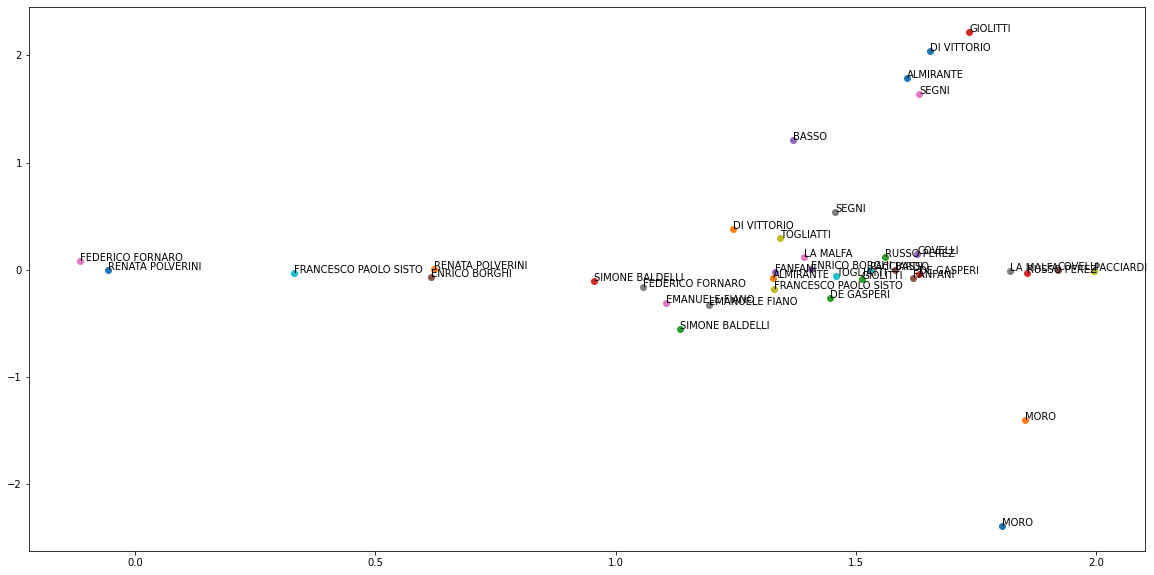

In [157]:
words = {}
plt.figure(figsize=(20,10))
for cog in legis:
    words[cog]=list(models[cog].wv.vocab)

for cog in legis:   
    for i, word in enumerate(words[cog]):
        if word == 'onorevole':
            plt.scatter(result[cog][i, 0], result[cog][i, 1])
            plt.annotate(cog, xy=(result[cog][i, 0], result[cog][i, 1]))
        if word == 'leggere':
            plt.scatter(result[cog][i, 0], result[cog][i, 1])
            plt.annotate(cog, xy=(result[cog][i, 0], result[cog][i, 1]))
            
            #sarebbe top fare sta roba con tipo 100 parole per politico e vedere i cluster

In [77]:
len(words_w2v['MORO'])

14577

In [ ]:
#capire come fare word embedding e confrontarlo

In [63]:
for cog in legis:
    print(cog)
    pprint(list(sorted(TfIdf[cog].items(), key=lambda x: -x[1]))[:10])

MORO
[('scabinato', 1.4745889415514335),
 ('sublocazione', 1.4740953057247224),
 ('cooperatore', 1.4737003970633535),
 ('sinistro1950', 1.473502942732669),
 ('sinistro1949', 1.4733054884019845),
 ('adrano', 1.4733054884019845),
 ('destro1952', 1.4733054884019845),
 ('leggere1953', 1.4733054884019845),
 ('topo', 1.4732067612366422),
 ('leggere1950', 1.4732067612366422)]
DE GASPERI
[('destropresidente', 1.4844117834928119),
 ('minislri', 1.4777060218425366),
 ('deputatopresidente', 1.477096407147057),
 ('consigzio', 1.4758771777560977),
 ('deputatzpresidente', 1.4752675630606182),
 ('canevari', 1.4746579483651385),
 ('randolfo', 1.474048333669659),
 ('.ministri', 1.474048333669659),
 ('inistra', 1.474048333669659),
 ('mozionepresidente', 1.474048333669659)]
FANFANI
[('socinle', 1.4789342877113079),
 ('settennio', 1.477255588179286),
 ('videnzn', 1.4761364551579377),
 ('idenza', 1.4755768886472638),
 ('etrusco', 1.4755768886472638),
 ('liquidatorio', 1.4750173221365899),
 ('ulignano', 1.4

In [64]:
type(TfIdf['MORO'])

dict

In [ ]:
for cog in legis_reduct_II:
    
    sort = list(sorted(TF[cog].items(), key=lambda x: -x[1]))[0:10]
    pprint(sort)

In [14]:
"""
words_tot = set()
cont = 0
for cog in legis_reduct_II:
    if cont==0:
        words_tot = set(words[cog])
    else:
        words_tot = words_tot.intersection(set(words[cog]))
    cont = cont+1 #ignoro le parole che non tutti hanno? in questo modo però tolgo i tratti caratteristici
                  #potrei mettere a 0 la freq
"""

In [80]:
words_tot_union = set() #FATTA CON UNION
cont = 0
for cog in legis_reduct_II:
    #if cont==0:
     #   words_tot_union = set(words[cog])
    #else:
       words_tot_union = words_tot_union.union(set(words[cog]))
    #cont = cont+1 
    
for cog in legis_reduct_I:
    words_tot_union = words_tot_union.union(set(words_I[cog]))

In [81]:
len(words_tot_union) #bho, perchè non cambia aggiungedo l'altra legis?

81939

In [83]:
words_tot_redu = {}
for w in words_tot_union:
    words_tot_redu[w] = 0

In [84]:
for cog in legis_reduct_II:
    for w in words_tot_union:
        if freqDist[cog][w] > 0.02:
            words_tot_redu[w] = words_tot_redu[w] +1
            
for cog in legis_reduct_I:
    for w in words_tot_union:
        if freqDist_I[cog][w] > 0.02:
            words_tot_redu[w] = words_tot_redu[w] +1

In [85]:
final_words = []
for w in words_tot_redu.keys():
    if words_tot_redu[w] < 15:
        final_words.append(w)

In [86]:
len(final_words)
#vengono troppe parole, dovrei mettere a 0 troppe cose e così avrei sempre similarità
#come faccio? considero solo le parole meno frequenti? 
#faccio una cosine similiraty solo tra parole con freq != da 0?
#oppure per il confronto di un politico con un altro considero solo le parole usate da entrambi

81939

In [87]:
for cog in legis_reduct_II:
    for w in words[cog]:
        if w not in final_words:
            freqDist[cog].pop(w)
    print(len(freqDist[cog]))

4722
4722
4722
4722
4722
4722


In [22]:
#metto a 0 la frequenza

for w in final_words:
    for cog in legis_reduct_II:
        if w not in freqDist[cog]:
            freqDist[cog][w]= 0

In [23]:
final_val = {}
for cog in legis_reduct_II:
    final_val[cog] = OrderedDict(sorted(freqDist[cog].items(), key=lambda t: t[0]))

In [25]:
only_val = {}
for cog in legis_reduct_II:
    only_val[cog] = []
    for k in final_val[cog].keys():
        only_val[cog].append(final_val[cog][k])

In [27]:
for cog in legis_reduct_II:
    print(len(only_val[cog]))

4722
4722
4722
4722
4722
4722


In [33]:
data = {}

for c in only_val.keys():
    data[c] = []
    for cog in legis_reduct_II:
        data[c].append((cog, cosine_similarity([only_val[c]],[only_val[cog]])))
        
        #sembrerebbe funzionare, va ricontrollato, sistemato, stampato meglio ma ha senso!

In [35]:
pprint(data)

{'EMANUELE FIANO': [('EMANUELE FIANO', array([[1.]])),
                    ('ENRICO BORGHI', array([[0.9097774]])),
                    ('FEDERICO FORNARO', array([[0.78278792]])),
                    ('FRANCESCO PAOLO SISTO', array([[0.85523981]])),
                    ('RENATA POLVERINI', array([[0.39490923]])),
                    ('SIMONE BALDELLI', array([[0.87648811]]))],
 'ENRICO BORGHI': [('EMANUELE FIANO', array([[0.9097774]])),
                   ('ENRICO BORGHI', array([[1.]])),
                   ('FEDERICO FORNARO', array([[0.7702422]])),
                   ('FRANCESCO PAOLO SISTO', array([[0.80861037]])),
                   ('RENATA POLVERINI', array([[0.34848593]])),
                   ('SIMONE BALDELLI', array([[0.8277662]]))],
 'FEDERICO FORNARO': [('EMANUELE FIANO', array([[0.78278792]])),
                      ('ENRICO BORGHI', array([[0.7702422]])),
                      ('FEDERICO FORNARO', array([[1.]])),
                      ('FRANCESCO PAOLO SISTO', array([[0.8

In [54]:
matrixdata

[[1.0, 0.90978, 0.78279, 0.85524, 0.39491, 0.87649],
 [0.90978, 1.0, 0.77024, 0.80861, 0.34849, 0.82777],
 [0.78279, 0.77024, 1.0, 0.80301, 0.36255, 0.85691],
 [0.85524, 0.80861, 0.80301, 1.0, 0.36166, 0.88295],
 [0.39491, 0.34849, 0.36255, 0.36166, 1.0, 0.37271],
 [0.87649, 0.82777, 0.85691, 0.88295, 0.37271, 1.0]]

In [56]:
data = np.array(matrixdata)
    
data = data.transpose()
#print(data)
#data = list(data)
#print(data)
data = np.array(data)
shape = ( len(legis_reduct_II), len(legis_reduct_II) )
data = data.reshape( shape )
data = np.array(data)
#print(data)

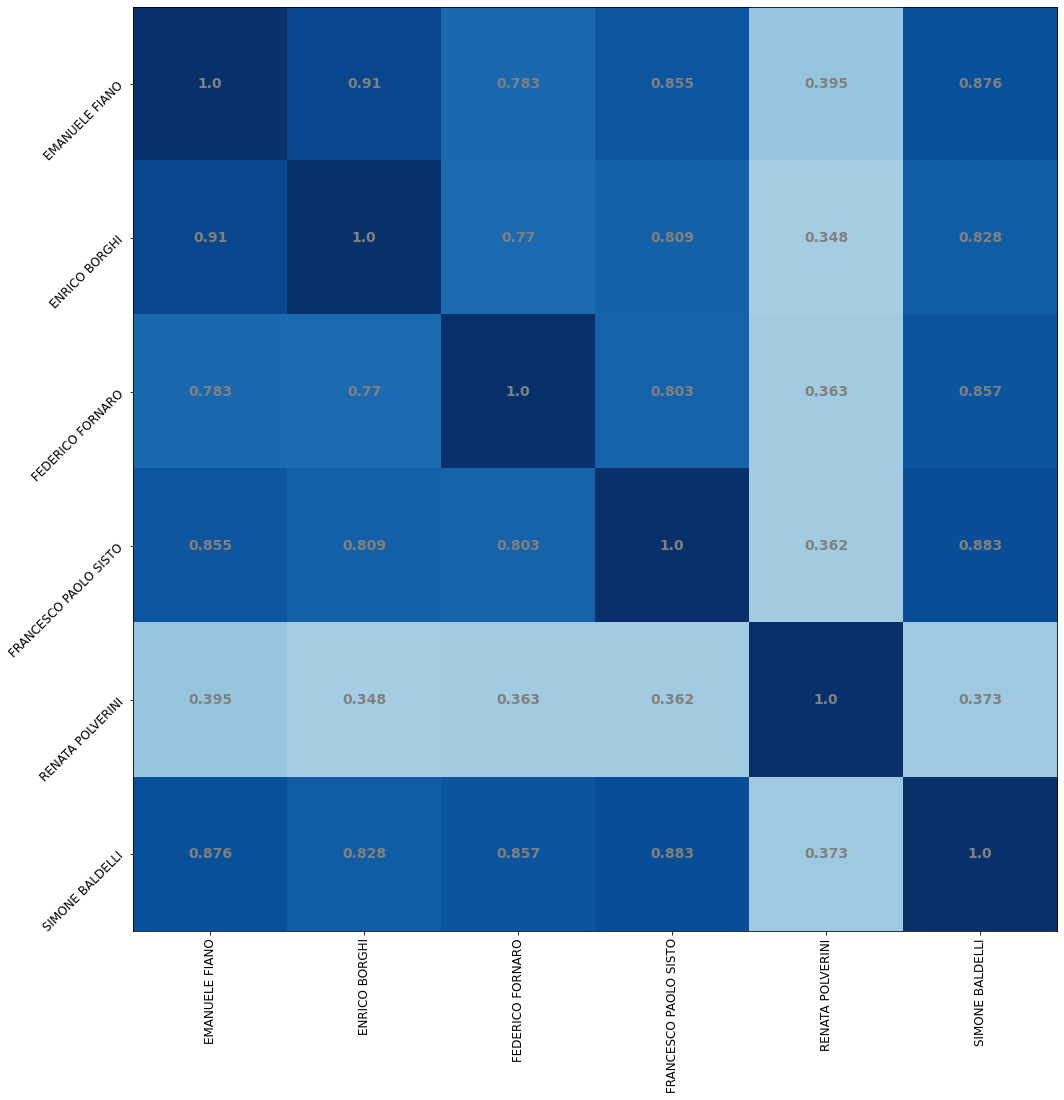

In [59]:
    #fig,ax= plt.subplots(2,2, figsize=(16,10))
    fig,ax= plt.subplots()
    
    ax.matshow(data, cmap=plt.cm.Blues, vmin=0, vmax=1,)
    #m = ax.imshow(harvest)
    
    for i in range(len(legis_reduct_II)):
        for j in range(len(legis_reduct_II)):
            c = data[j,i]
            ax.text(i, j, round(c,3), va='center', ha='center', color ='grey', weight='bold', size=14)
    #ax.colorbar()
    #ax.set_title("Test error per la label: ", size = 20)
    #ax.xlabels("Lambda")
    
    ax.set_xticks(np.arange(len((legis_reduct_II))))
    ax.set_yticks(np.arange(len(legis_reduct_II)))

    ax.set_yticklabels(legis_reduct_II, size = 12, rotation = 45)
    ax.set_xticklabels(legis_reduct_II, size = 12,rotation = 90 )
    #plt.xlabel("Lambda", size=17, labelpad = 25)
    #plt.ylabel("Iterazioni", size = 17, labelpad = 25)
    
    #plt.colorbar(data=data)
    fig.set_size_inches(17, 17)
    ax.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)
    plt.show()
    #fig.savefig('img/testerrormatrix'+str(title[index])+'.png', dpi=100)
    #fig.savefig('matrixacc'+title[index]+'.png', dpi=100) #sistemare bene e poi salvare

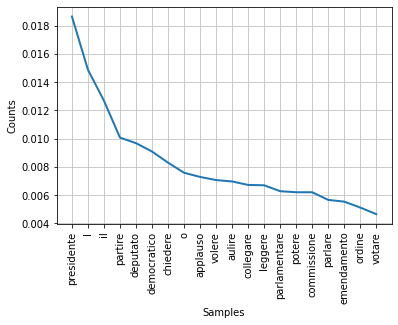

In [30]:
freqDist['EMANUELE FIANO'].plot(20)

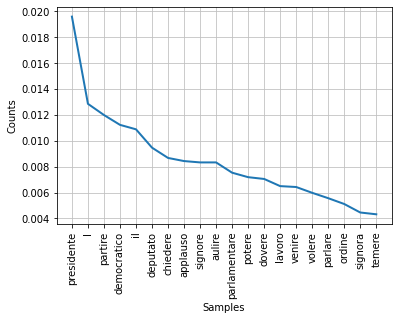

In [31]:
freqDist['ENRICO BORGHI'].plot(20)

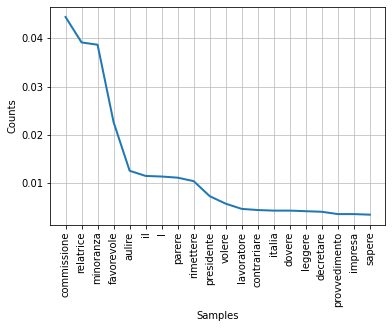

In [32]:
freqDist['RENATA POLVERINI'].plot(20)

In [24]:
separator = ' '
corpora = [separator.join(elem) for elem in discorsi_puliti['EMANUELE FIANO']]

In [37]:
corpora = [reduce(operator.concat, discorsi_puliti['EMANUELE FIANO'])]

In [47]:
corpora2 = [reduce(operator.concat, discorsi_puliti['ENRICO BORGHI'])]

In [46]:
len(corpora[0])

40603

In [53]:
len(corpora2[0])

28937

In [40]:
text1 = corpora[0]
freqDist = FreqDist(text1)

In [51]:
for w in words:
    freqDist[w] = freqDist[w] / 40603

In [48]:
text2 = corpora2[0]
freqDist2 = FreqDist(text2)

In [54]:
for w in words2:
    freqDist2[w] = freqDist2[w] / 28937

In [72]:
words = list(freqDist.keys())

In [73]:
words2 = list(freqDist2.keys())

In [74]:
w = set(words)
w2 = set(words2)

In [79]:
words_tot = []
for w in words:
    if w in words2:
        words_tot.append(w)

In [75]:
words_tot = w.intersection(w2)

In [80]:
if 'e' in words_tot:
    print('si')

si


In [81]:
words_tot_redu = []

In [124]:
freqDist['EMANUELE FIANO']['e']

0.03797748934807773

In [67]:
freqDist['e']

0.03797748934807773

In [68]:
freqDist2['e']

0.04644572692400733

In [82]:
for w in words_tot:
    if freqDist[w]>0.03 and freqDist2[w]>0.03:
        print(w)
    else: words_tot_redu.append(w)
    

’
e


In [83]:
len(words_tot_redu)

2290

In [84]:
for w in words:
    if w not in words_tot_redu:
        freqDist.pop(w)

In [85]:
for w in words2:
    if w not in words_tot_redu:
        freqDist2.pop(w)

In [89]:
len(freqDist2)

2290

In [91]:
fd = OrderedDict(sorted(freqDist.items(), key=lambda t: t[0]))

In [92]:
fd2 = OrderedDict(sorted(freqDist2.items(), key=lambda t: t[0]))

In [102]:
val = []
for k in fd.keys():
    val.append(fd[k])

In [103]:
val2 = []
for k in fd2.keys():
    val2.append(fd2[k])

In [105]:
len(val)

2290

In [107]:
cosine_similarity([val],[val2])

array([[0.93743003]])

In [94]:
print(fd2)

OrderedDict([('):', 3.4557832532743545e-05), ('-35', 3.4557832532743545e-05), ('-berlusconi', 0.0005529253205238967), ('-legge', 6.911566506548709e-05), ('-salvini', 0.00020734699519646128), ('0', 6.911566506548709e-05), ('1', 0.0005183674879911532), ('10', 0.0003455783253274355), ('100', 0.00010367349759823064), ('104', 6.911566506548709e-05), ('106', 3.4557832532743545e-05), ('11', 0.00020734699519646128), ('110', 6.911566506548709e-05), ('112', 6.911566506548709e-05), ('116', 6.911566506548709e-05), ('117', 0.00013823133013097418), ('12', 0.00010367349759823064), ('120', 6.911566506548709e-05), ('125', 3.4557832532743545e-05), ('126', 6.911566506548709e-05), ('129', 0.00010367349759823064), ('13', 0.0003455783253274355), ('130', 0.00010367349759823064), ('134', 3.4557832532743545e-05), ('14', 0.00020734699519646128), ('146', 3.4557832532743545e-05), ('15', 0.00027646266026194836), ('150', 3.4557832532743545e-05), ('151', 6.911566506548709e-05), ('16', 0.00010367349759823064), ('160'

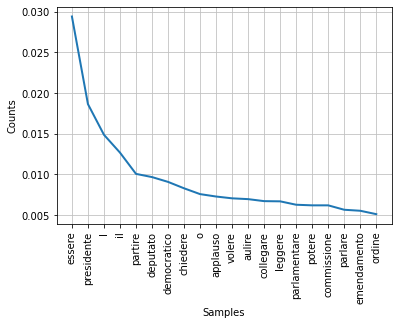

In [86]:
freqDist.plot(20)

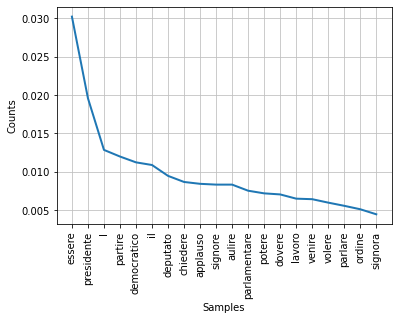

In [87]:
freqDist2.plot(20)

In [8]:
def unigram (word, corpora):
    cont = 0
    for c in corpora:
        if c == word:
            cont = cont+1
    return cont

In [9]:
def p(word, corpora):
    f_sharp = sum([unigram(word,x) for x in corpora])
    return f_sharp / sum([len(x) for x in corpora])

In [10]:
def pmi(word, corpus, all_corpora):
    if p(word, all_corpora) == 0:
        return False
    else: 
        return np.log(p(word,[corpus]) / p(word, all_corpora))

In [12]:
tokens = lambda text: [x.lemma_ for x in nlp(text) if x.pos_ not in ['PUNCT', 'SPACE'] and not x.is_stop]
all_tokens = lambda text: [x.lemma_ for x in nlp(text) if x.pos_ not in ['PUNCT', 'SPACE']]

In [14]:
pprint(discorsi_puliti['EMANUELE FIANO'][200])



['presidente',
 'permettere',
 'collegare',
 'parlare',
 'cosa',
 'e',
 'permettere',
 'parlare',
 'cosa',
 'applauso',
 'deputato',
 'partire',
 'democratico',
 'partire',
 'democratico',
 'testimoniare',
 'sottosegretario',
 'molteni',
 'stanziare',
 'cinque',
 '7',
 'euro',
 'e',
 'comprendere',
 'piare',
 'quinquennale',
 'numerare',
 'assunzione',
 'leggere',
 'bilanciare',
 'conta',
 'previsto',
 'decennio',
 'collegare',
 'molteni',
 'stimare',
 'essere',
 'alzare',
 'e',
 'l’',
 'onorevole',
 'fiano',
 'dire',
 'verità',
 'applauso',
 'deputato',
 'partire',
 'democratico']


In [14]:
TF, k = {}, 0.5
cont = 0
separator = ' '


for cog in legis_reduct_II:
    text = discorsi_puliti[cog]
    text = [separator.join(elem) for elem in text]
    text = reduce(operator.concat, text)
   
    f = Counter(all_tokens(text)).most_common() #le stopwrods le ho già tolte
    
    maxf = f[0][1]
    TF[cog] = dict([(token, k + (1 - k) * (x / maxf)) for token, x in f])



In [15]:
for cog in legis_reduct_II:
    
    sort = list(sorted(TF[cog].items(), key=lambda x: -x[1]))[0:10]
    pprint(sort)

[('’', 1.0),
 ('e', 0.8843452082288008),
 ('essere', 0.7962870045158053),
 ('presidente', 0.6555444054189664),
 ('l', 0.6507777220270948),
 ('il', 0.6289513296537883),
 ('partire', 0.6138986452584044),
 ('deputare', 0.6046161565479177),
 ('collegare', 0.6011038635223281),
 ('o', 0.577019568489714)]
[('’', 1.0),
 ('e', 0.9702549575070821),
 ('essere', 0.8080736543909348),
 ('presidente', 0.6805949008498584),
 ('l', 0.6313739376770539),
 ('partire', 0.6306657223796034),
 ('il', 0.6115439093484419),
 ('deputare', 0.6012747875354107),
 ('applauso', 0.5860481586402266),
 ('aulire', 0.5839235127478754)]
[('e', 1.0),
 ('’', 0.9338925220358261),
 ('essere', 0.8313903895365369),
 ('l', 0.6397497867500711),
 ('il', 0.5938299687233437),
 ('credere', 0.5871481376172875),
 ('puntare', 0.5733579755473415),
 ('presidente', 0.5671026442991186),
 ('collegare', 0.5634063121978959),
 ('dovere', 0.557150980949673)]
[('’', 1.0),
 ('e', 0.9500295683027794),
 ('essere', 0.9452986398580722),
 ('l', 0.67829686

In [16]:
DF, N = defaultdict(lambda: 0), len(legis_reduct_II)
for k, bow in TF.items():
    for t in bow.keys():
        DF[t] += 1
IDF = lambda x: np.log(N / DF[x])

In [17]:
print(DF['penale'])
print(IDF('penale'))
print(DF['ecosistema'])


5
0.1823215567939546
0


In [18]:
for cog in legis_reduct_II:
    print(cog)
    pprint(list(sorted(IDF[cog].items(), key=lambda x: -x[1]))[:20])

EMANUELE FIANO


TypeError: 'function' object is not subscriptable

In [19]:
TfIdf = {}
for k, bow in TF.items():
    TfIdf[k] = dict([(token, w * IDF(token)) for token, w in bow.items()])

In [20]:
for cog in legis_reduct_II:
    print(cog)
    pprint(list(sorted(TfIdf[cog].items(), key=lambda x: -x[1]))[:20])

EMANUELE FIANO
[('neofascista', 0.9039709715548466),
 ('neonazista', 0.8994758399210582),
 ('unicamente', 0.8994758399210582),
 ('savoini', 0.8994758399210582),
 ('antisemita', 0.8990263267576794),
 ('raduzzi', 0.8990263267576794),
 ('casapound', 0.8985768135943004),
 ('militanza', 0.8985768135943004),
 ('restringimento', 0.8985768135943004),
 ('dis', 0.8985768135943004),
 ('cvcn', 0.8985768135943004),
 ('audire', 0.8981273004309216),
 ('discriminatorio', 0.8981273004309216),
 ('razzista', 0.8981273004309216),
 ('trascendere', 0.8981273004309216),
 ('irregolarità', 0.8981273004309216),
 ('confermativo', 0.8981273004309216),
 ('referendabili', 0.8981273004309216),
 ('parlarescusare', 0.8981273004309216),
 ('modificativa', 0.8981273004309216)]
ENRICO BORGHI
[('sdoganare', 0.9028589676740517),
 ('commissariamento', 0.9015900162085927),
 ('savona', 0.8996865890104044),
 ('arteria', 0.8996865890104044),
 ('schizofrenia', 0.8990521132776749),
 ('regolamentaresignore', 0.8990521132776749),
 (

In [21]:
corpora = [reduce(operator.concat, discorsi_puliti[k]) for k in legis_reduct_II]

In [79]:
words = []
for c in legis_reduct_II:
    five = (list(sorted(TF[c].items(), key=lambda x: -x[1]))[10:15])
    for f in five:
        words.append(f[0])

In [28]:
res_list = [x[0] for x in TfIdf['FRANCESCO PAOLO SISTO'].items()]

In [29]:
res_list

['’',
 'e',
 'essere',
 'l',
 'presidente',
 'il',
 'italia',
 'potere',
 'parlamentare',
 'emendamento',
 'deputare',
 'aulire',
 'volere',
 'provvedimento',
 'applauso',
 'costituzione',
 'articolare',
 'dovere',
 'votare',
 'cioè',
 'norma',
 '-berlusconi',
 'diritto',
 'diro',
 'costituzionale',
 'leggero',
 'c',
 'partire',
 'o',
 'credere',
 'rispettare',
 'puntare',
 'democrazia',
 'commissione',
 'proporre',
 'dare',
 'collegare',
 'intervento',
 'principiare',
 'sapere',
 'parola',
 'pensare',
 'andare',
 'scrivere',
 'chiedere',
 'ordine',
 'politico',
 'democratico',
 'accadere',
 'fronte',
 'venire',
 'datare',
 'sistemare',
 '5',
 'd',
 'consentire',
 'vistare',
 'parlare',
 'temere',
 'contare',
 'penale',
 'rendere',
 'termine',
 'stellare',
 'scegliere',
 'gruppo',
 'difendere',
 'passare',
 'camera',
 'sorgere',
 'berlusconi',
 '0',
 'intervenire',
 'possibilità',
 'evidente',
 'chiaro',
 'regolamentare',
 'vedere',
 'significare',
 'modificare',
 'ragione',
 'vero',
 

In [61]:
words_union = set()
cont = 0
for c in legis_reduct_II:
    if cont == 0:
        res_list = [x[0] for x in TfIdf[cog].items() if x[1]>0.2]
        print(len(res_list))
        words_union = set(res_list)
    else: 
        res_list = [x[0] for x in TfIdf[cog].items() if x[1]>0.2]
        print(len(res_list))
        words_union.intersection(res_list)
    cont = cont+1

3449
3449
3449
3449
3449
3449


In [62]:
words_reduct = []
cont = 0
for w in words_union:
    if cont < 500:
        words_reduct.append(w)
    cont = cont+1

In [ ]:
#il problema è quando una parola non c'è p c'è in pochi doc perchè ho -100 che mi sballa la cosine simi
#forse dorvrei scegliere words che ho in tutti i doc? però così come faccio con le altre legis?

In [63]:
matrixdata = []
data = {}
#words = ['presidente', 'parlamentare', 'italia', 'emendamento', 'razzista']
corpora = [reduce(operator.concat, discorsi_puliti[k]) for k in legis_reduct_II]
cog = legis_reduct_II
cont = 0
for word in words_reduct:
    data[word] = {}
    cont = 0
    m = []
    for corpus in corpora:
        val = pmi(word,corpus, corpora)
        if val == False:
            data[word]["{}".format( 
                cog[cont])] = -100
            m.append(-100)
        else: 
            data[word]["{}".format( 
                cog[cont])] = round(pmi(word,corpus, corpora), 3)
            m.append(round(pmi(word,corpus, corpora), 3))
        cont = cont+1
        
    matrixdata.append(m)

In [64]:
PMI = pd.DataFrame(data)

In [65]:
print(PMI)

                       conteggiare  scopriamoli  scapitare  vivaddio  \
EMANUELE FIANO                -inf         -inf       -inf      -inf   
ENRICO BORGHI                 -inf         -inf       -inf      -inf   
FEDERICO FORNARO              -inf         -inf     -0.113      -inf   
FRANCESCO PAOLO SISTO         -inf         -inf       -inf      -inf   
RENATA POLVERINI              -inf         -inf       -inf      -inf   
SIMONE BALDELLI              1.601        1.601      1.313     1.601   

                       balletto  privarsi  schedare  sovrapporli  itinerante  \
EMANUELE FIANO             -inf      -inf    -0.175         -inf        -inf   
ENRICO BORGHI             0.937      -inf      -inf         -inf        -inf   
FEDERICO FORNARO          0.175      -inf      -inf         -inf        -inf   
FRANCESCO PAOLO SISTO      -inf      -inf     1.306         -inf        -inf   
RENATA POLVERINI           -inf      -inf      -inf         -inf        -inf   
SIMONE BALDELLI

In [66]:
data = np.array(matrixdata)
    
data = data.transpose()
#print(data)
#data = list(data)
#print(data)
data = np.array(data)
shape = ( len(legis_reduct_II), len(words_reduct) )
data = data.reshape( shape )
data = np.array(data)
#print(data)

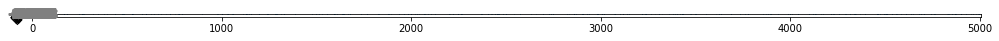

In [45]:
    title = ['33', '70','101', '4']
    color = ['Blues', 'Oranges', 'Greens', 'red']

    #fig,ax= plt.subplots(2,2, figsize=(16,10))
    fig,ax= plt.subplots()
    
    ax.matshow(data, cmap=plt.cm.Blues, vmin=-5, vmax=5,)
    #m = ax.imshow(harvest)
    
    for i in range(10):
        for j in range(len(legis_reduct_II)):
            c = data[j,i]
            ax.text(i, j, round(c,3), va='center', ha='center', color ='grey', weight='bold', size=14)
    #ax.colorbar()
    #ax.set_title("Test error per la label: ", size = 20)
    #ax.xlabels("Lambda")
    
    ax.set_xticks(np.arange(len((words))))
    ax.set_yticks(np.arange(len(cog)))

    ax.set_yticklabels(cog, size = 12, rotation = 45)
    ax.set_xticklabels(words, size = 12,rotation = 90 )
    #plt.xlabel("Lambda", size=17, labelpad = 25)
    #plt.ylabel("Iterazioni", size = 17, labelpad = 25)
    
    #plt.colorbar(data=data)
    fig.set_size_inches(17, 17)
    ax.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)
    plt.show()
    #fig.savefig('img/testerrormatrix'+str(title[index])+'.png', dpi=100)
    #fig.savefig('matrixacc'+title[index]+'.png', dpi=100) #sistemare bene e poi salvare

In [47]:
for d in matrixdata:
    print(len(d))

6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6


6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6


In [67]:
cont = 0
pos = 0
for d in data:
    pos = 0
    for n in d:
        if np.isinf(n):
            data[cont][pos] = -10
        pos = pos +1
    cont = cont +1
        

In [68]:
simil = {}
cont = 0
for d in data:
    cog = legis_reduct_II[cont]
    simil[cog] = []
    for d1 in data:
        res = cosine_similarity([d], [d1])
        simil[cog].append(res)
    cont = cont+1

In [69]:
pprint(simil)

{'EMANUELE FIANO': [array([[1.]]),
                    array([[0.98291582]]),
                    array([[0.98118399]]),
                    array([[0.97905196]]),
                    array([[0.98481755]]),
                    array([[0.94853053]])],
 'ENRICO BORGHI': [array([[0.98291582]]),
                   array([[1.]]),
                   array([[0.98058134]]),
                   array([[0.97951791]]),
                   array([[0.98323634]]),
                   array([[0.94632366]])],
 'FEDERICO FORNARO': [array([[0.98118399]]),
                      array([[0.98058134]]),
                      array([[1.]]),
                      array([[0.97882625]]),
                      array([[0.97801579]]),
                      array([[0.955914]])],
 'FRANCESCO PAOLO SISTO': [array([[0.97905196]]),
                           array([[0.97951791]]),
                           array([[0.97882625]]),
                           array([[1.]]),
                           array([[0.98253469]]),
 

In [ ]:
    title = ['33', '70','101', '4']
    color = ['Blues', 'Oranges', 'Greens', 'red']

    #fig,ax= plt.subplots(2,2, figsize=(16,10))
    fig,ax= plt.subplots()
    
    ax.matshow(data, cmap=plt.cm.Blues, vmin=-5, vmax=5,)
    #m = ax.imshow(harvest)
    
    for i in range(len(legis_reduct_II)):
        for j in range(len(legis_reduct_II)):
            c = data[j,i]
            ax.text(i, j, round(c,3), va='center', ha='center', color ='grey', weight='bold', size=14)
    #ax.colorbar()
    #ax.set_title("Test error per la label: ", size = 20)
    #ax.xlabels("Lambda")
    
    ax.set_xticks(np.arange(len((words))))
    ax.set_yticks(np.arange(len(cog)))

    ax.set_yticklabels(cog, size = 12, rotation = 45)
    ax.set_xticklabels(words, size = 12,rotation = 90 )
    #plt.xlabel("Lambda", size=17, labelpad = 25)
    #plt.ylabel("Iterazioni", size = 17, labelpad = 25)
    
    #plt.colorbar(data=data)
    fig.set_size_inches(17, 17)
    ax.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)
    plt.show()
    #fig.savefig('img/testerrormatrix'+str(title[index])+'.png', dpi=100)
    #fig.savefig('matrixacc'+title[index]+'.png', dpi=100) #sistemare bene e poi salvare

In [118]:
simil = {}
d = data[0]
for d1 in data:
        print(cosine_similarity([d], [d1]))

[[1.]]
[[0.72038537]]
[[0.99823161]]
[[0.99883747]]
[[0.57621105]]
[[0.99893717]]


In [22]:
cont = 0
for d in data[1]:
    if np.isinf(d):
        data[1][cont] = -100
    cont = cont+1

In [25]:
cont = 0
for d in data[5]:
    if np.isinf(d):
        data[5][cont] = -100
    cont = cont+1

In [23]:
print(data[1])

[-4.010e-01 -9.730e-01 -1.648e+00 -6.000e-03 -1.000e+02 -1.000e+02]


In [26]:
 cosine_similarity([data[1]], [data[5]])

array([[0.99995539]])

In [ ]:
#potrei fare cosine similarity tra i vettori di ciascun politico per vedere quali sono più simili ad altri
#che parole uso per calcolare MPI?